In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.insert(0, os.environ['PLOT_SETTINGS_DIR'])
import plot_settings

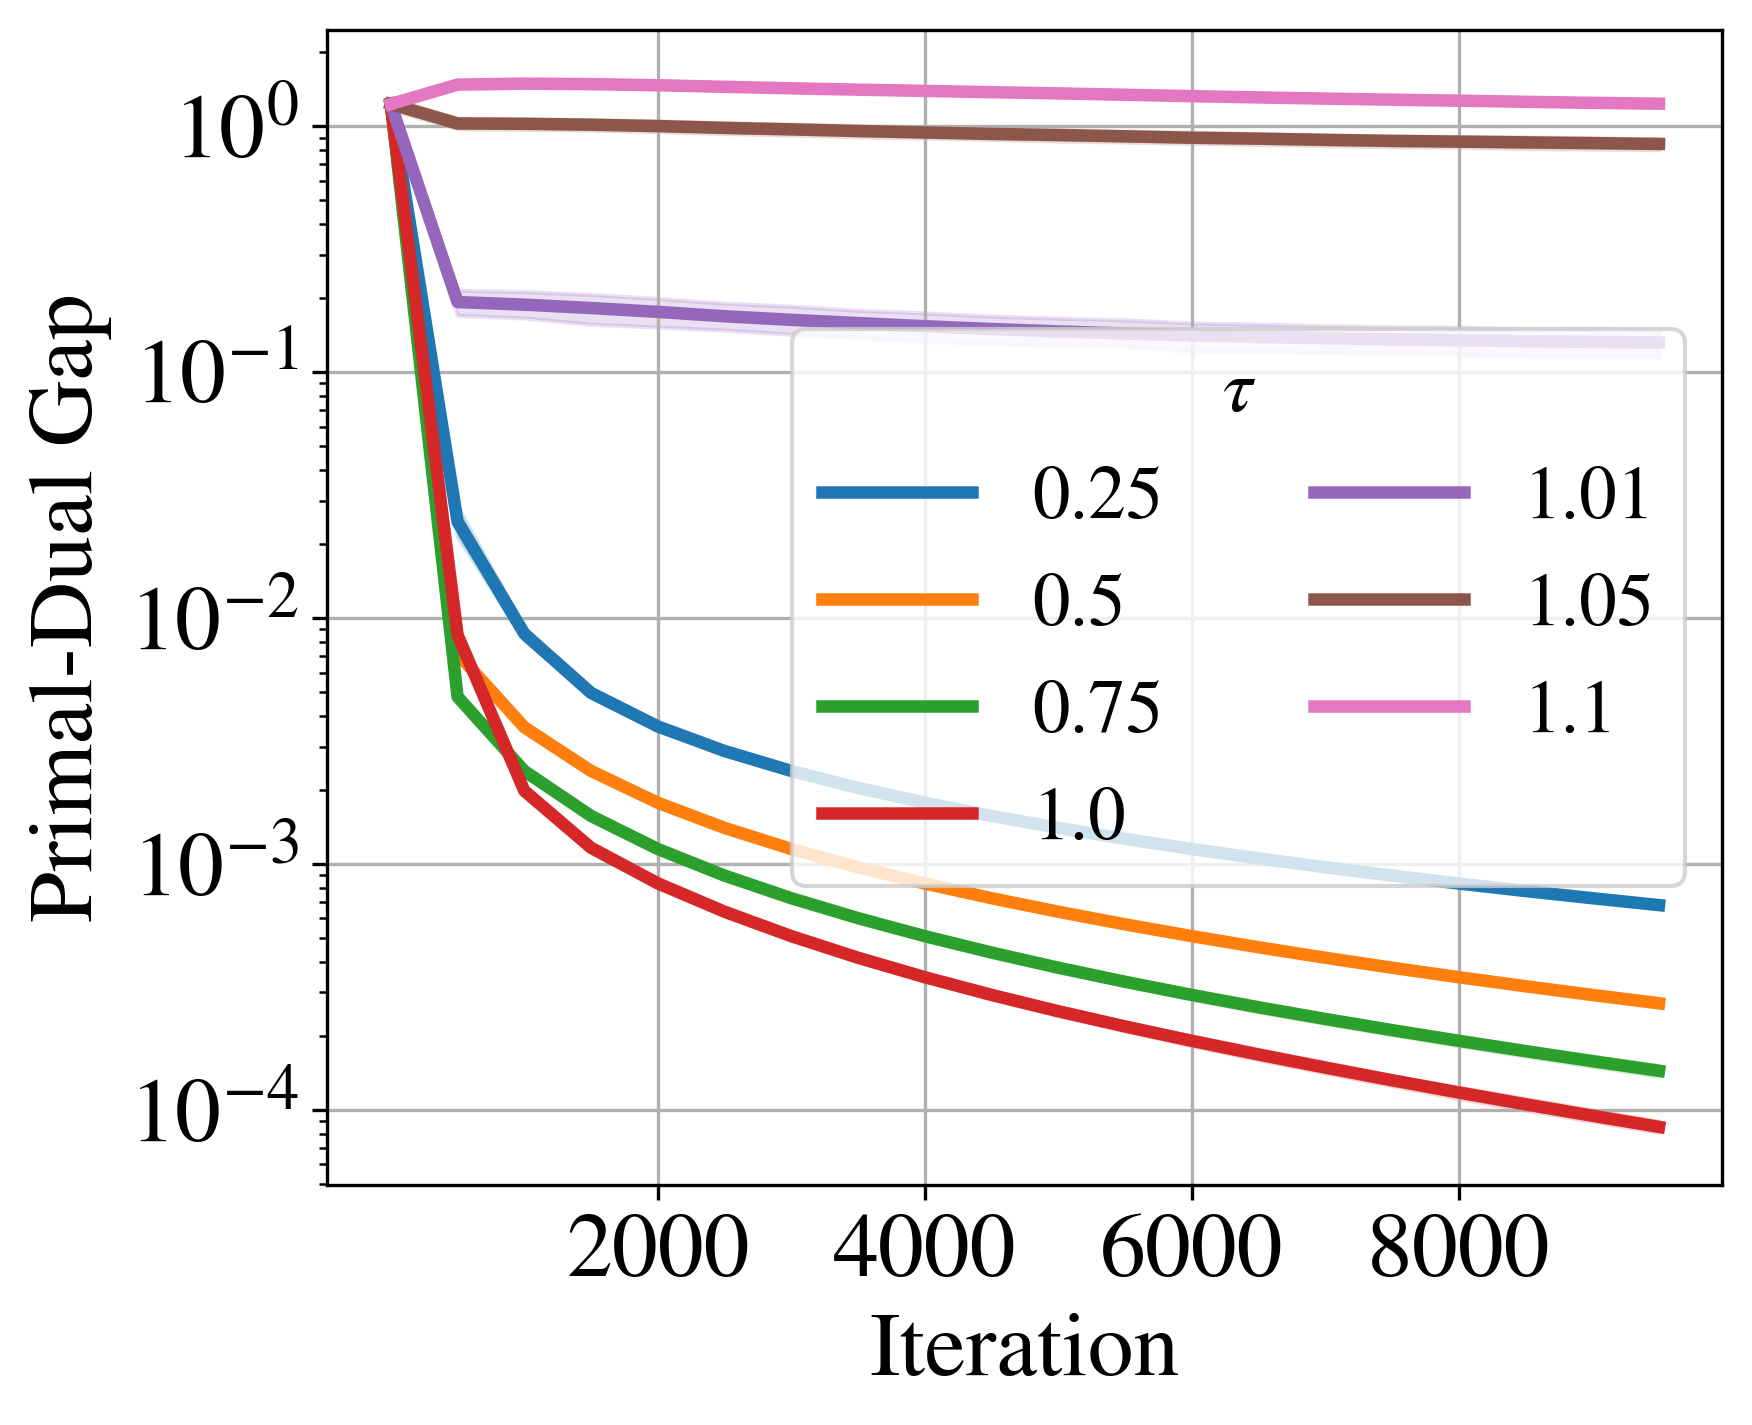

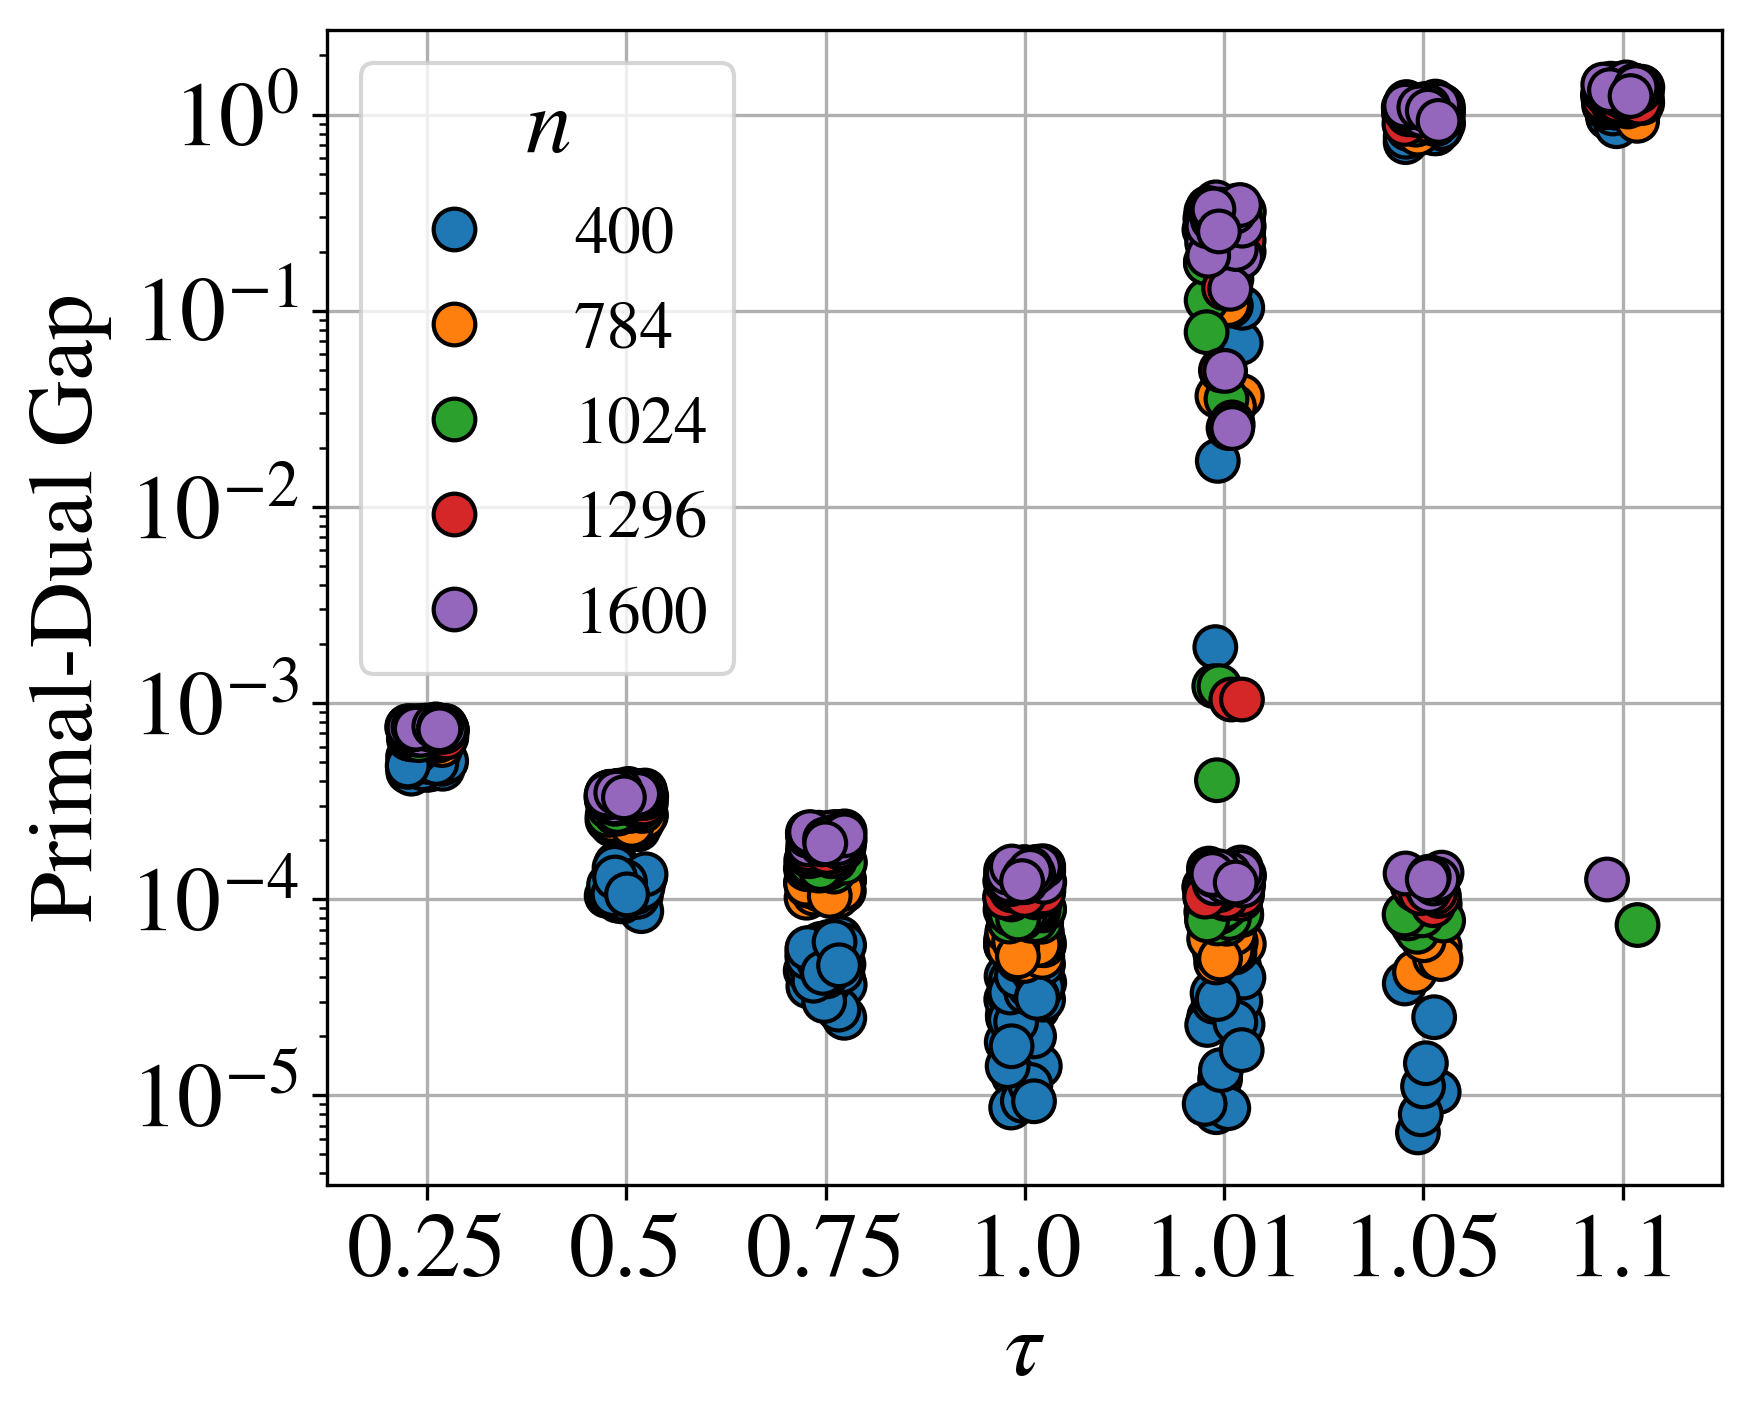

In [3]:
from matplotlib.ticker import FixedLocator
df = pd.read_csv("../plot_data/stepsize_experiment_32.csv")
# df = df.query("N <= 1024")
df['pd_gap'] = df['primal'] - df['dual']
limdf = df.loc[(df['tau'] != 0.1) & (df['N'] > 100)]
# for n, sdf in df.groupby('N'):
fig, ax = plt.subplots(figsize=(6,5))
sns.lineplot(limdf,ax=ax, x='iter', y='pd_gap', hue='tau', palette = 'tab10', linewidth=3, err_style='band')
ax.set_yscale('log')
ax.legend(title='$\\tau$', title_fontsize=18, fontsize=18, ncols=2)
ax.set_ylabel("Primal-Dual Gap")
ax.set_xlabel("Iteration")
ax.xaxis.set_major_locator(FixedLocator([1000 * i for i in [2, 4, 6, 8]]))
ax.grid()
plt.show()
fig.savefig("../figures/tau_jump_lineplot.pdf", bbox_inches='tight')


fig, ax = plt.subplots(figsize=(6,5))
sns.stripplot(limdf.query("iter == 9501"), ax=ax, x="tau", y='pd_gap', hue='N', palette='tab10', s=10, edgecolor='k', linewidth=1)
ax.set_yscale('log')
ax.set_ylabel("Primal-Dual Gap")
ax.set_xlabel("$\\tau$")
ax.legend(title="$n$", bbox_to_anchor=(0,1), loc='upper left', fontsize=16)
ax.grid()
fig.savefig("../figures/tau_jump_stripplot.pdf", bbox_inches='tight')


/tmp/ipykernel_1584169/3656514413.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lim_df['solver'] = lim_df['solver'].replace({


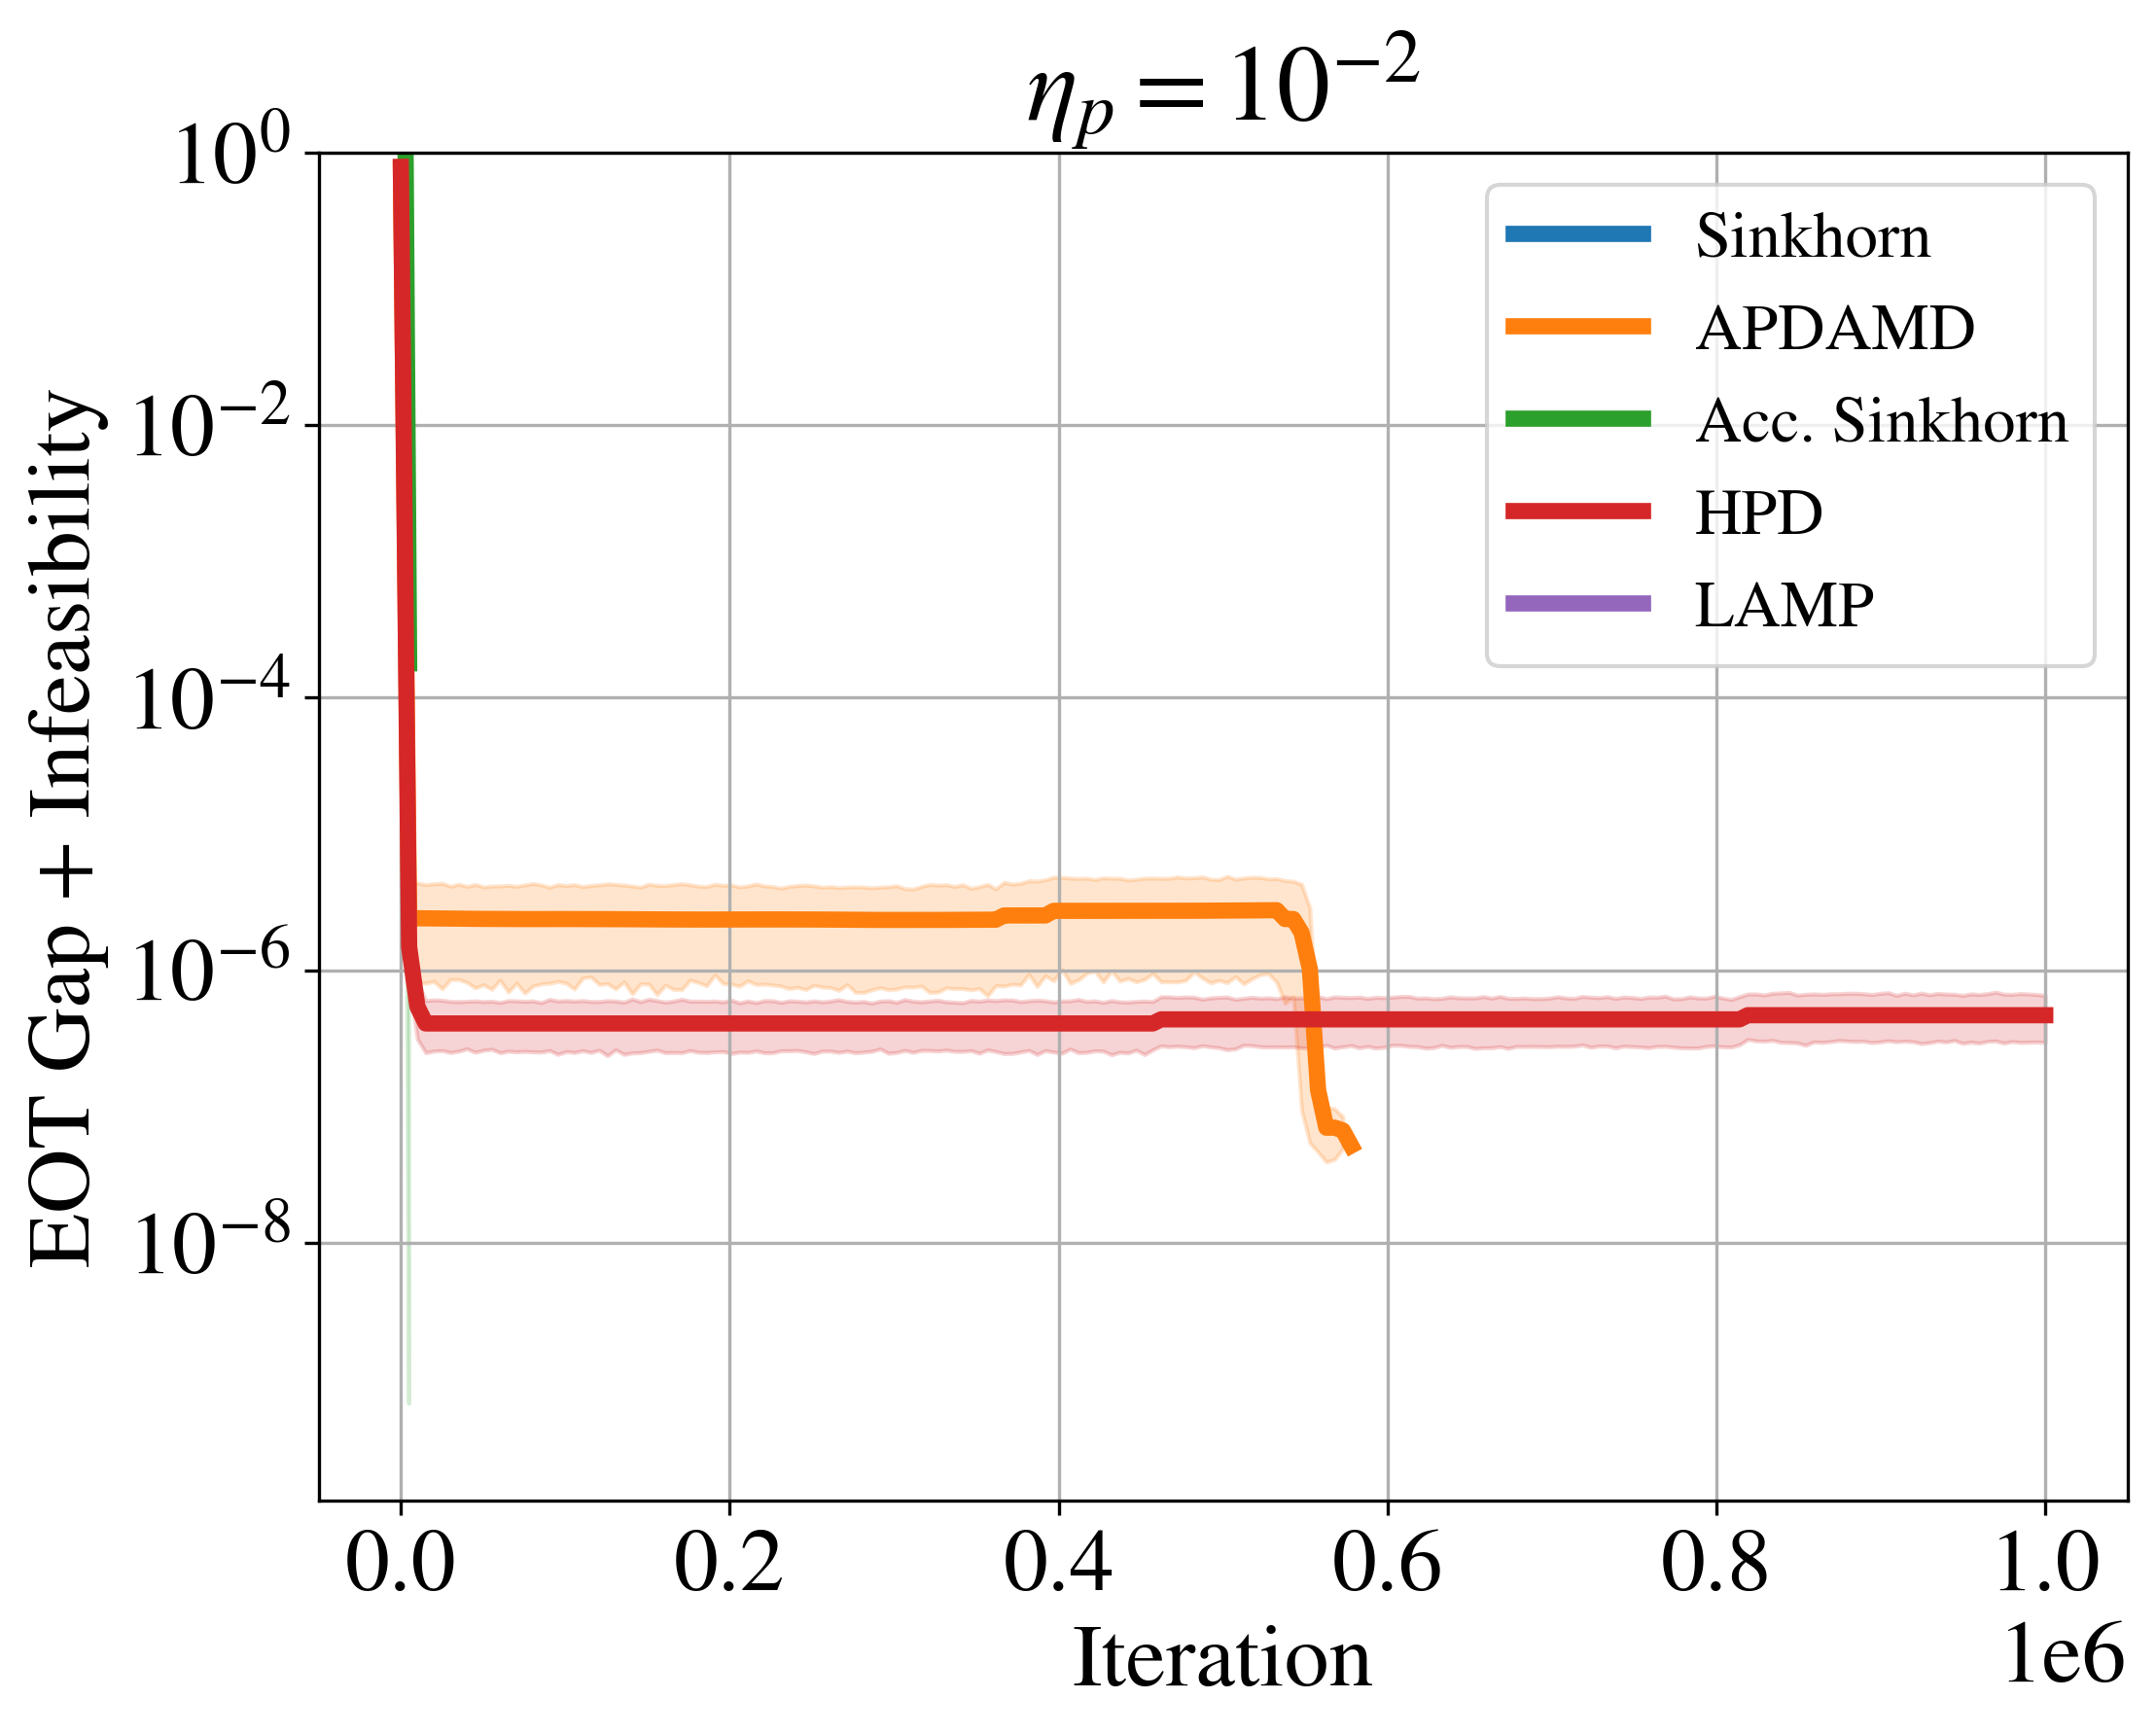

/tmp/ipykernel_1584169/3656514413.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lim_df['solver'] = lim_df['solver'].replace({


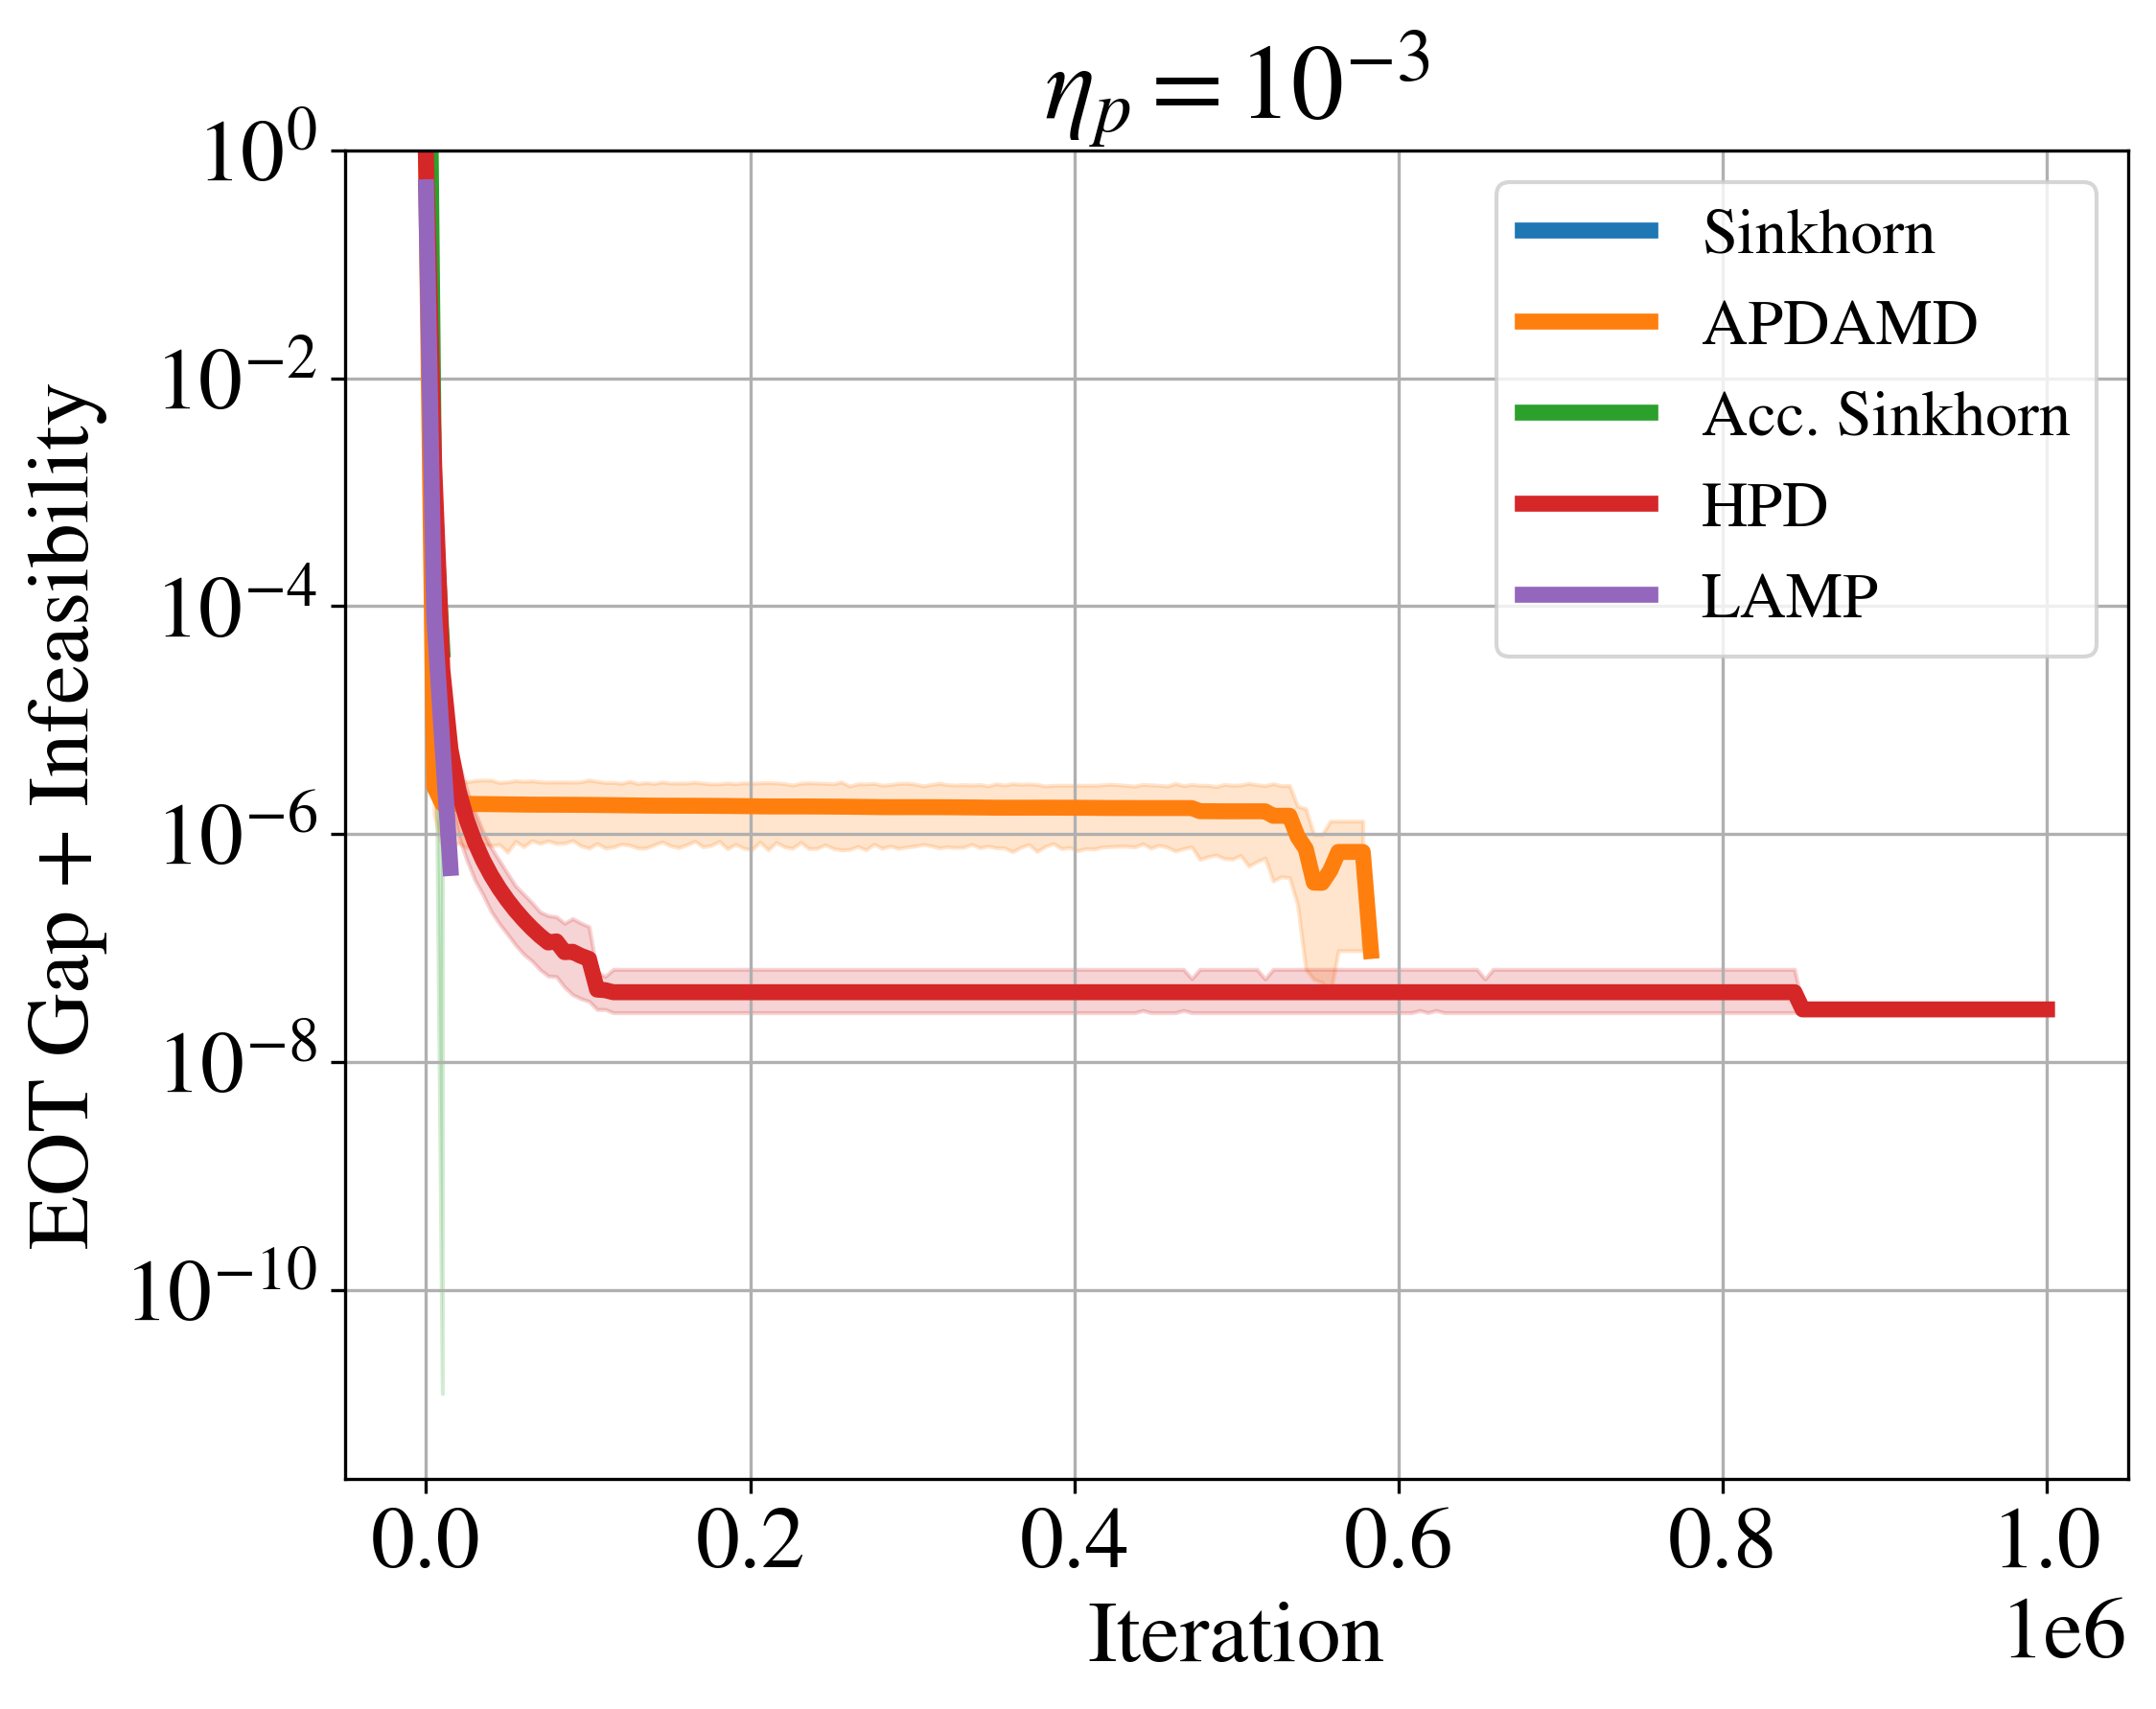

/tmp/ipykernel_1584169/3656514413.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lim_df['solver'] = lim_df['solver'].replace({


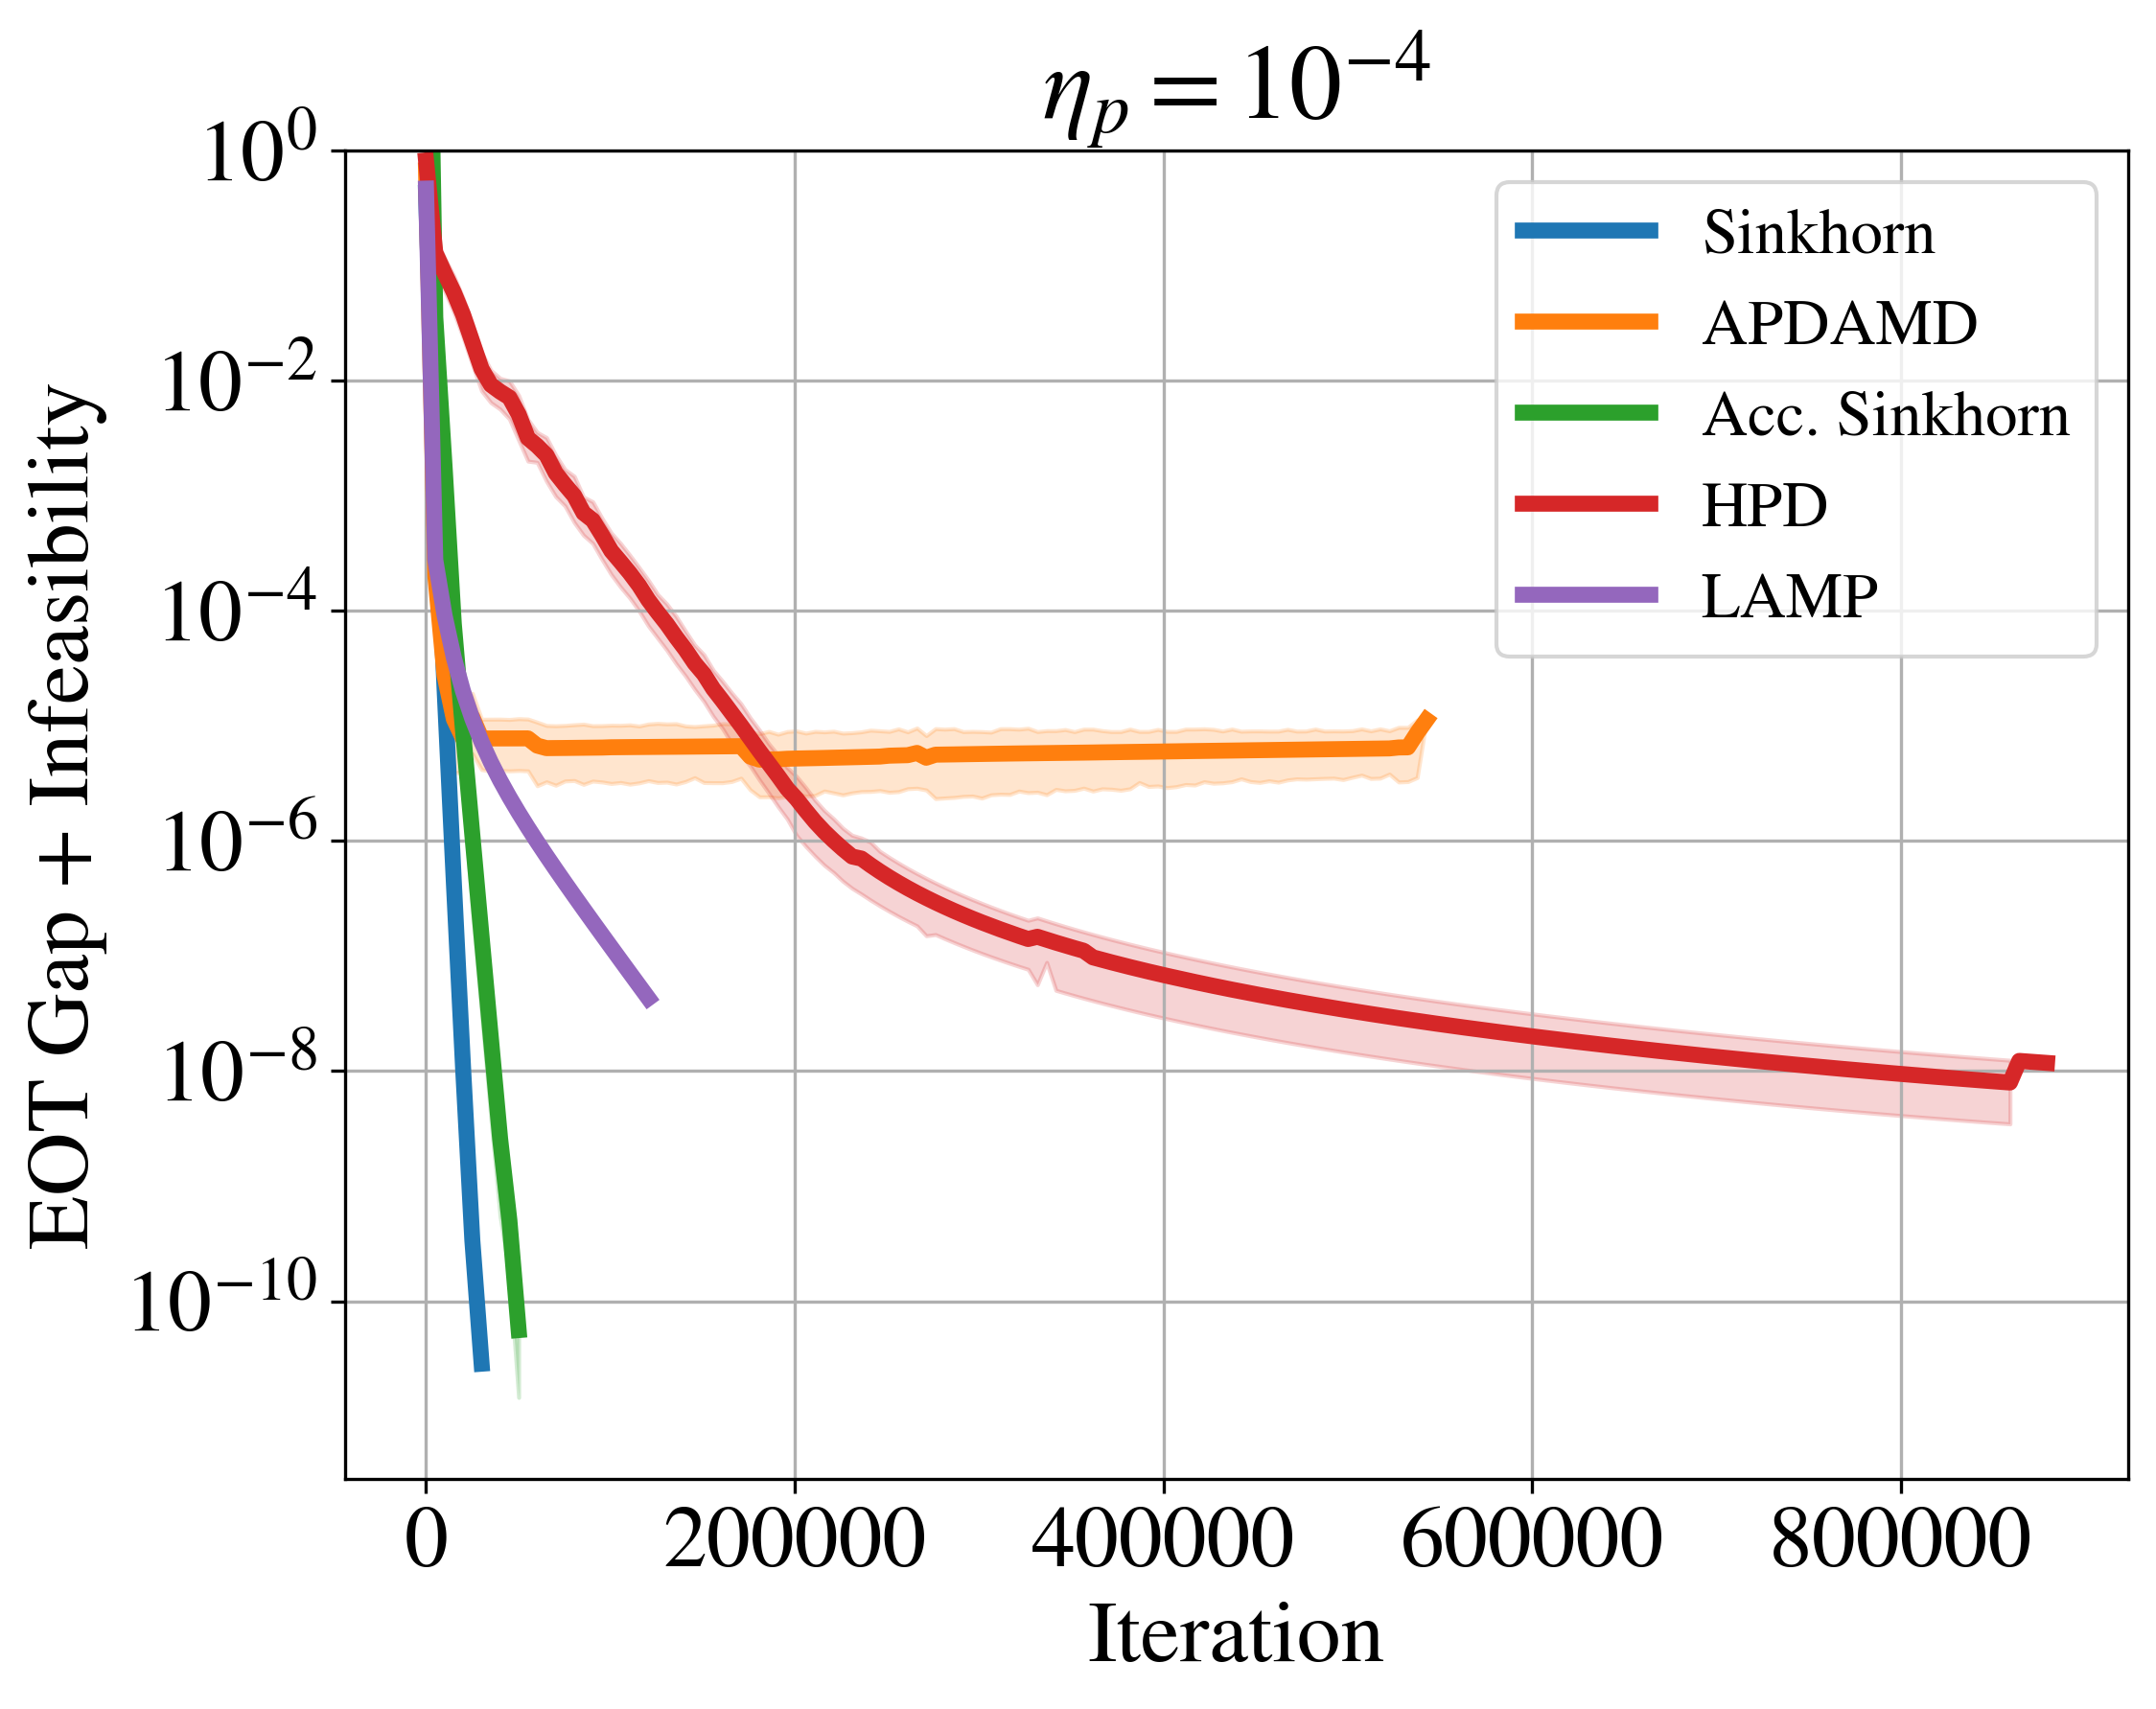

/tmp/ipykernel_1584169/3656514413.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lim_df['solver'] = lim_df['solver'].replace({


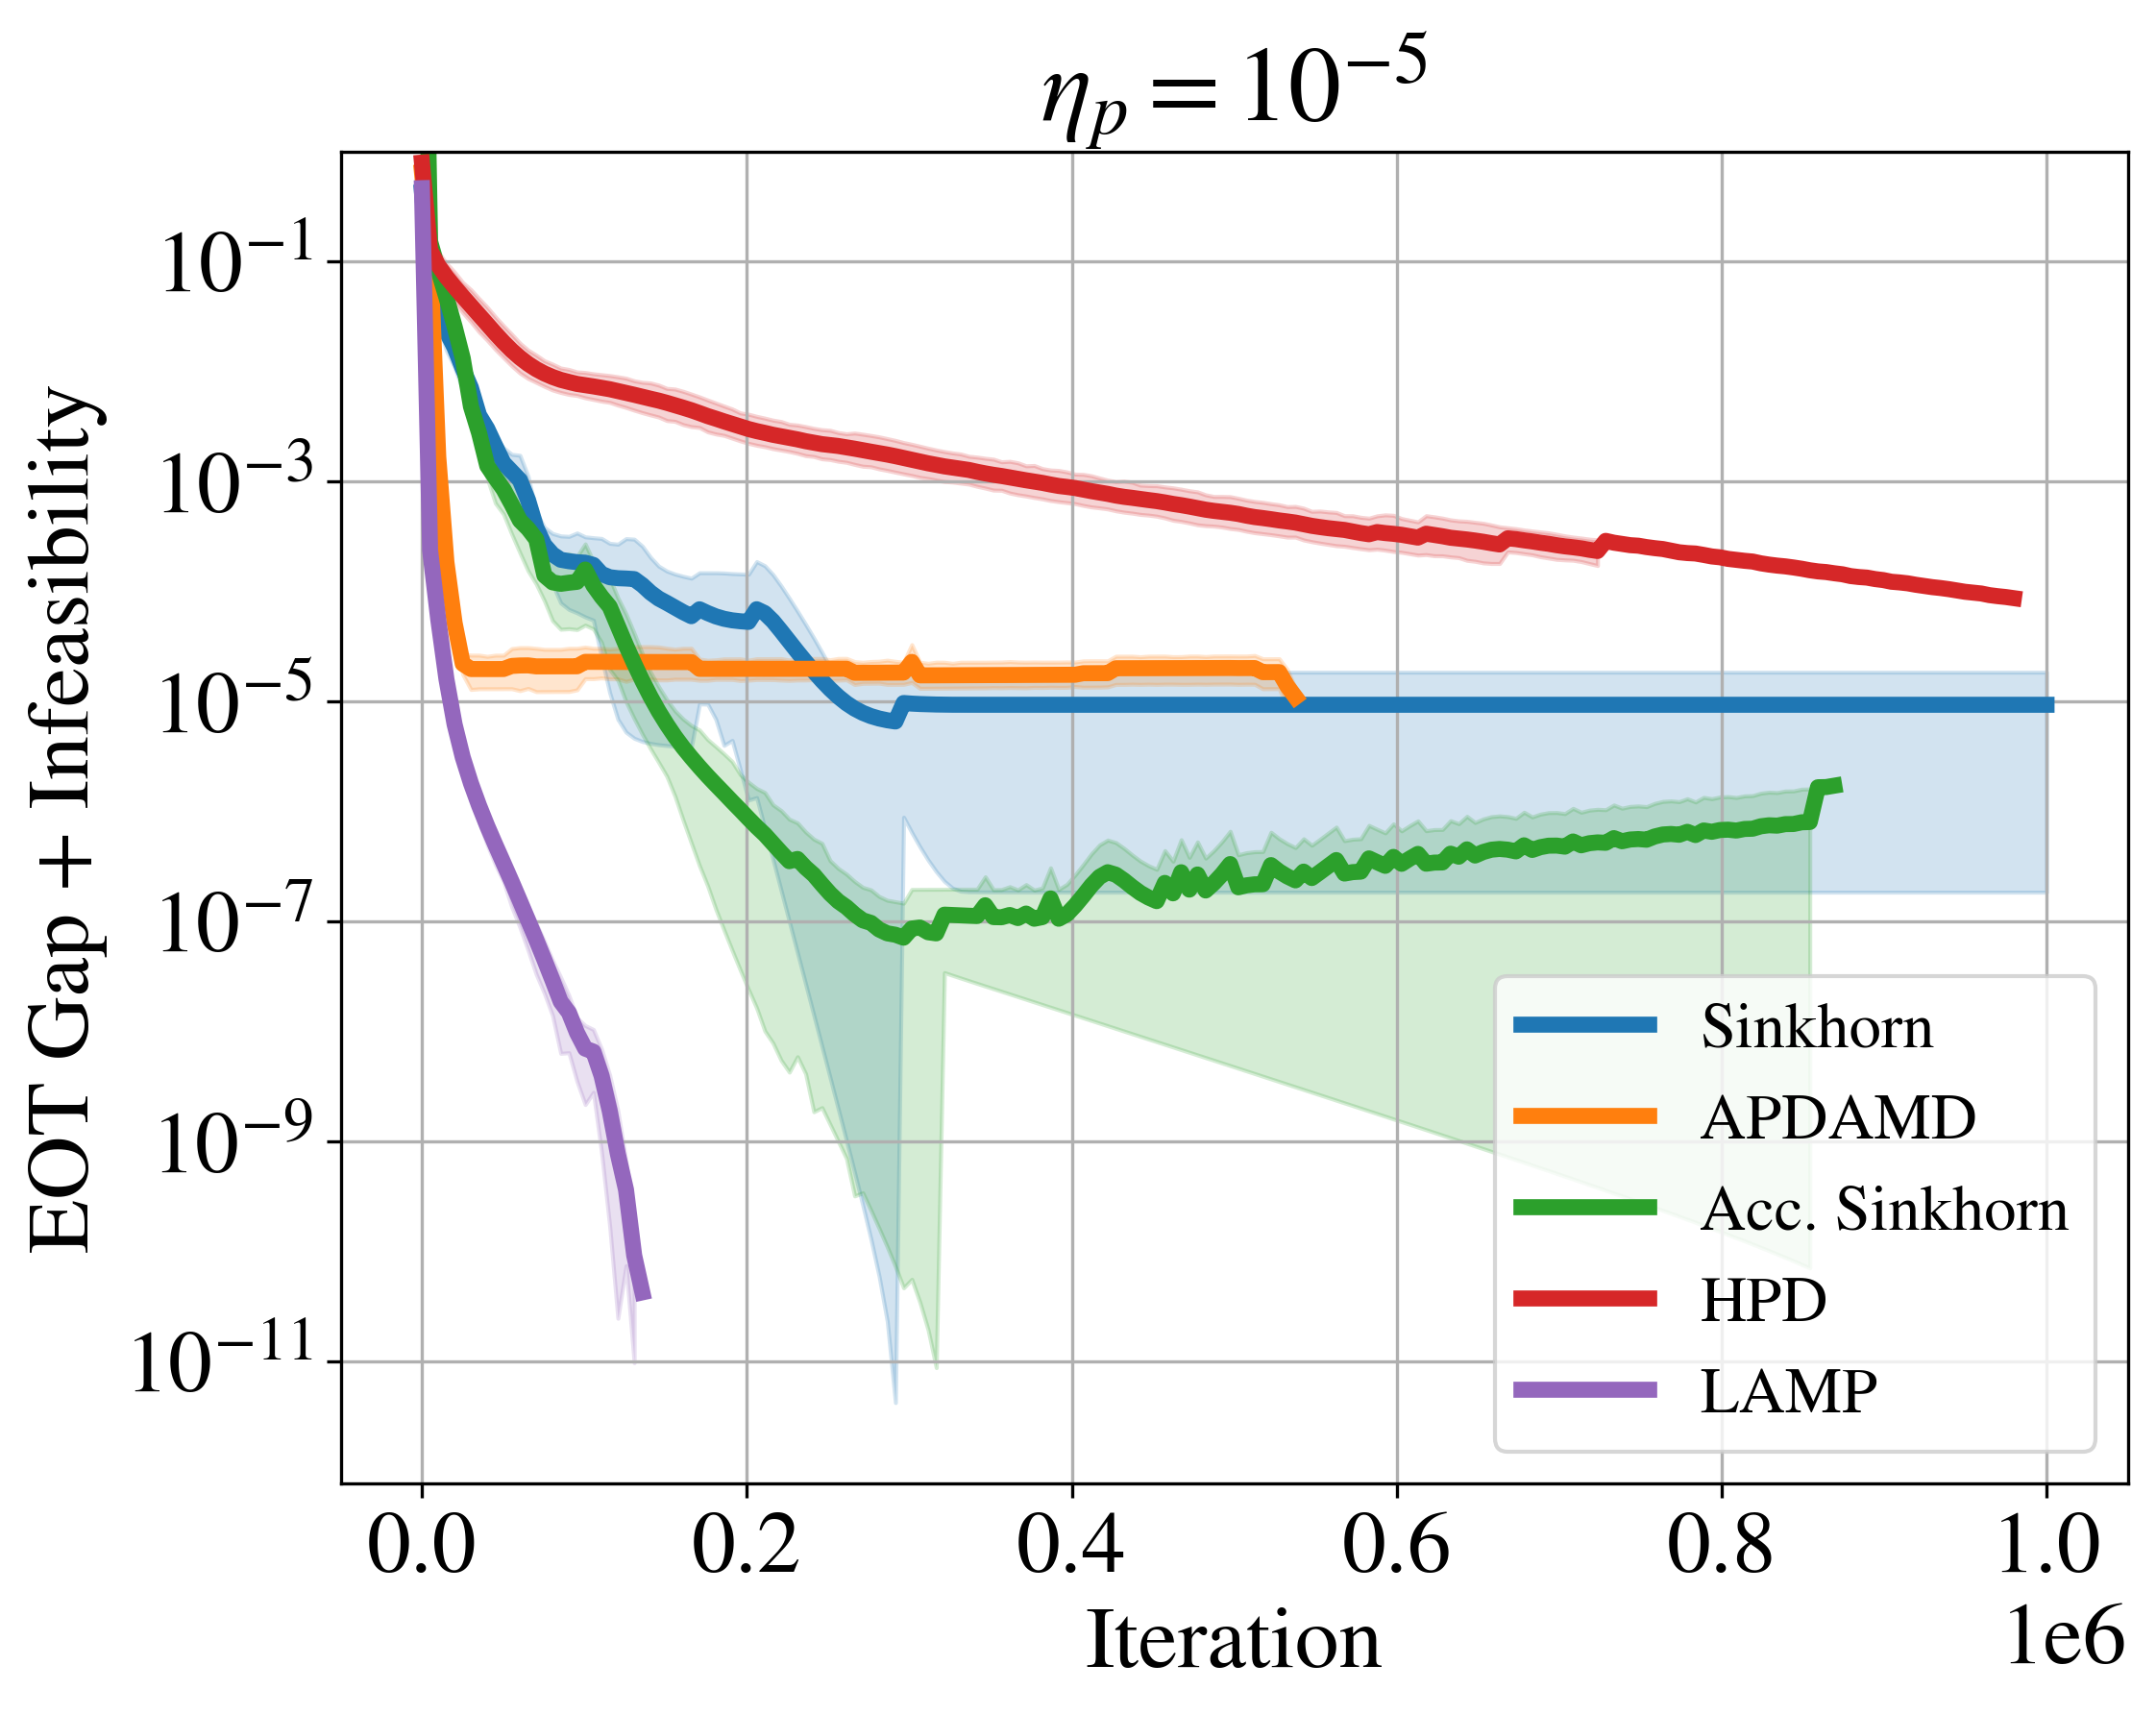

/tmp/ipykernel_1584169/3656514413.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lim_df['solver'] = lim_df['solver'].replace({


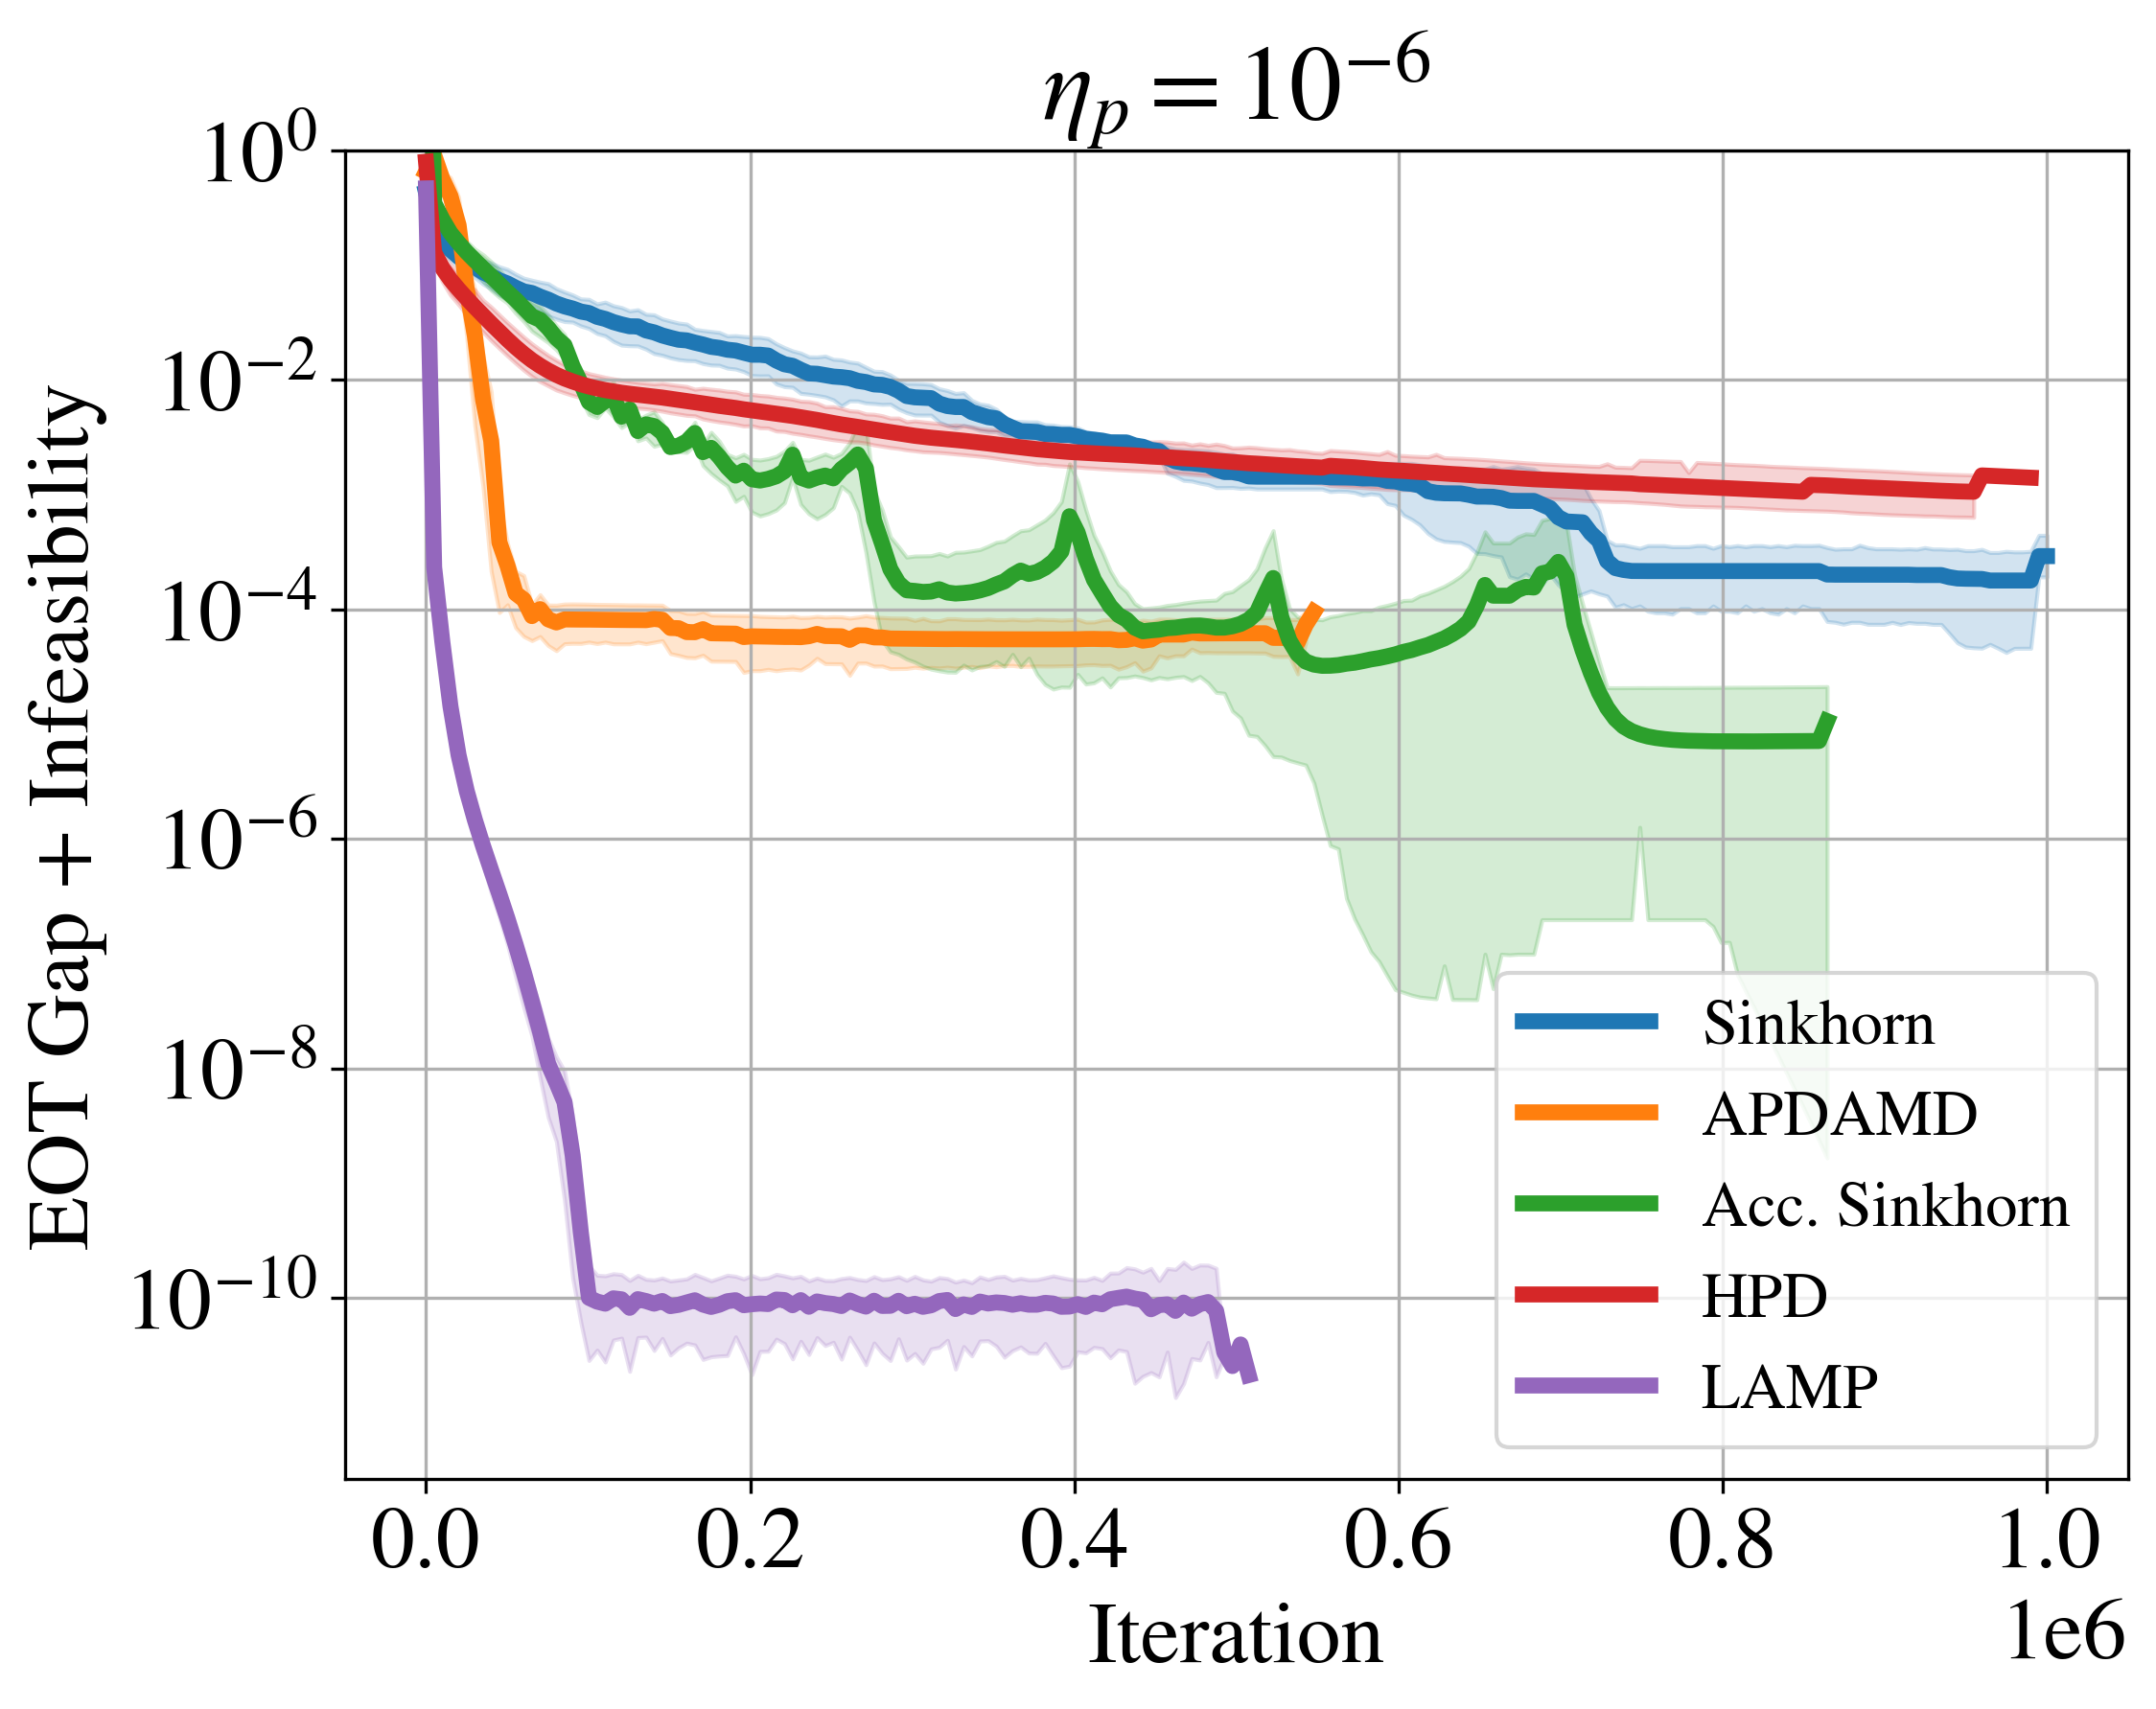

/tmp/ipykernel_1584169/3656514413.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lim_df['solver'] = lim_df['solver'].replace({


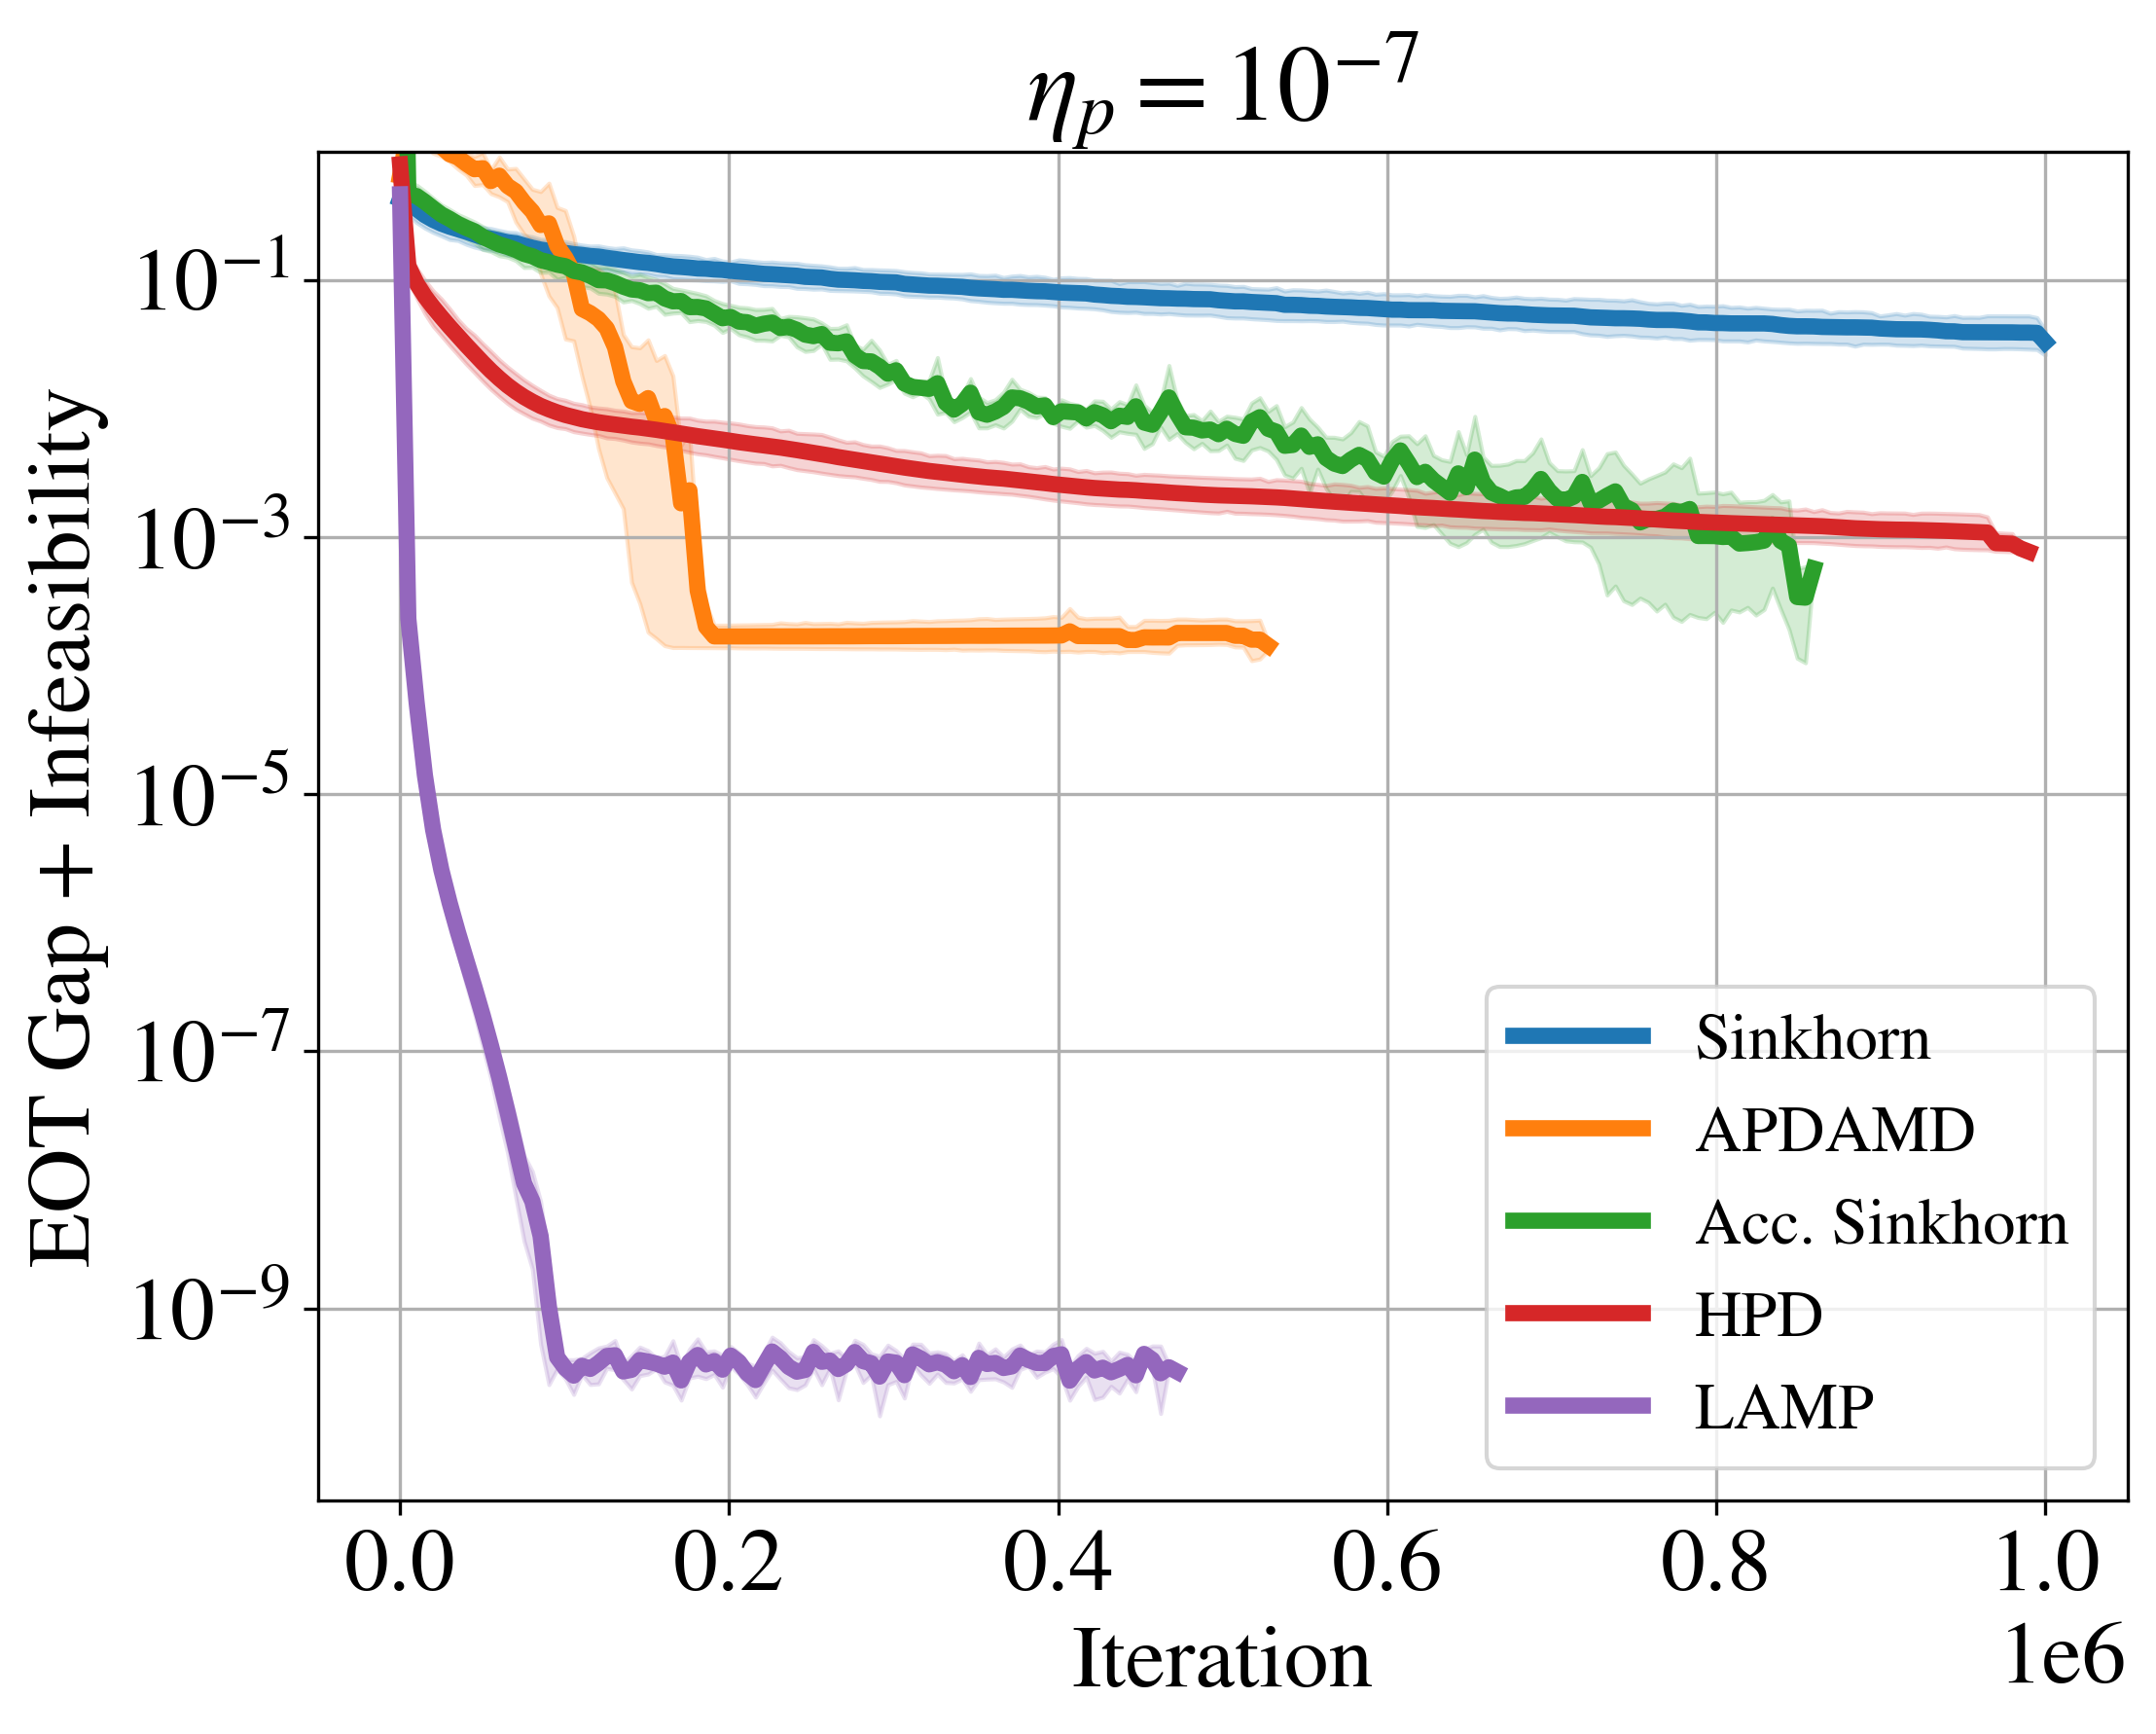

In [4]:
# probclass = 'classicimages'
df = pd.read_csv("../data_archive/fig_2_dotmark_comp.csv")
for eta in [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]:
    fig, ax = plt.subplots(figsize=(8, 6))

    lim_df = df.query(f'eta == {eta}')
    lim_df['solver'] = lim_df['solver'].replace({
        'apdamd': "APDAMD",
        'sinkhorn': "Sinkhorn",
        'dual_extragradient': "LAMP",
        'hpd': "HPD",
        'accelerated_sinkhorn': "Acc. Sinkhorn"
    })

    hue_order = [
        "Sinkhorn",
        "APDAMD",
        "Acc. Sinkhorn",
        "HPD",
        "LAMP"
    ]
    ax=sns.lineplot(lim_df, ax=ax, x='iter', y='objective_gap', hue='solver', hue_order=hue_order, linewidth=4)
    ax.set_yscale('log')
    # ax.set_xscale(10000)
    ax.set_ylim((ax.get_ylim()[0], 1))
    # ax.set_xlim((ax.get_xlim()[0], 10000))
    ax.legend(fontsize=16)
    ax.grid()
    ax.set_ylabel('EOT Gap + Infeasibility')
    ax.set_xlabel('Iteration')
    ax.set_title('$\\eta_p=10^{%d}$' % (round(np.log10(eta))))
    plt.show()
    fig.savefig(f'../figures/broad_dotmark_1en{eta}_lamp.pdf', bbox_inches='tight')


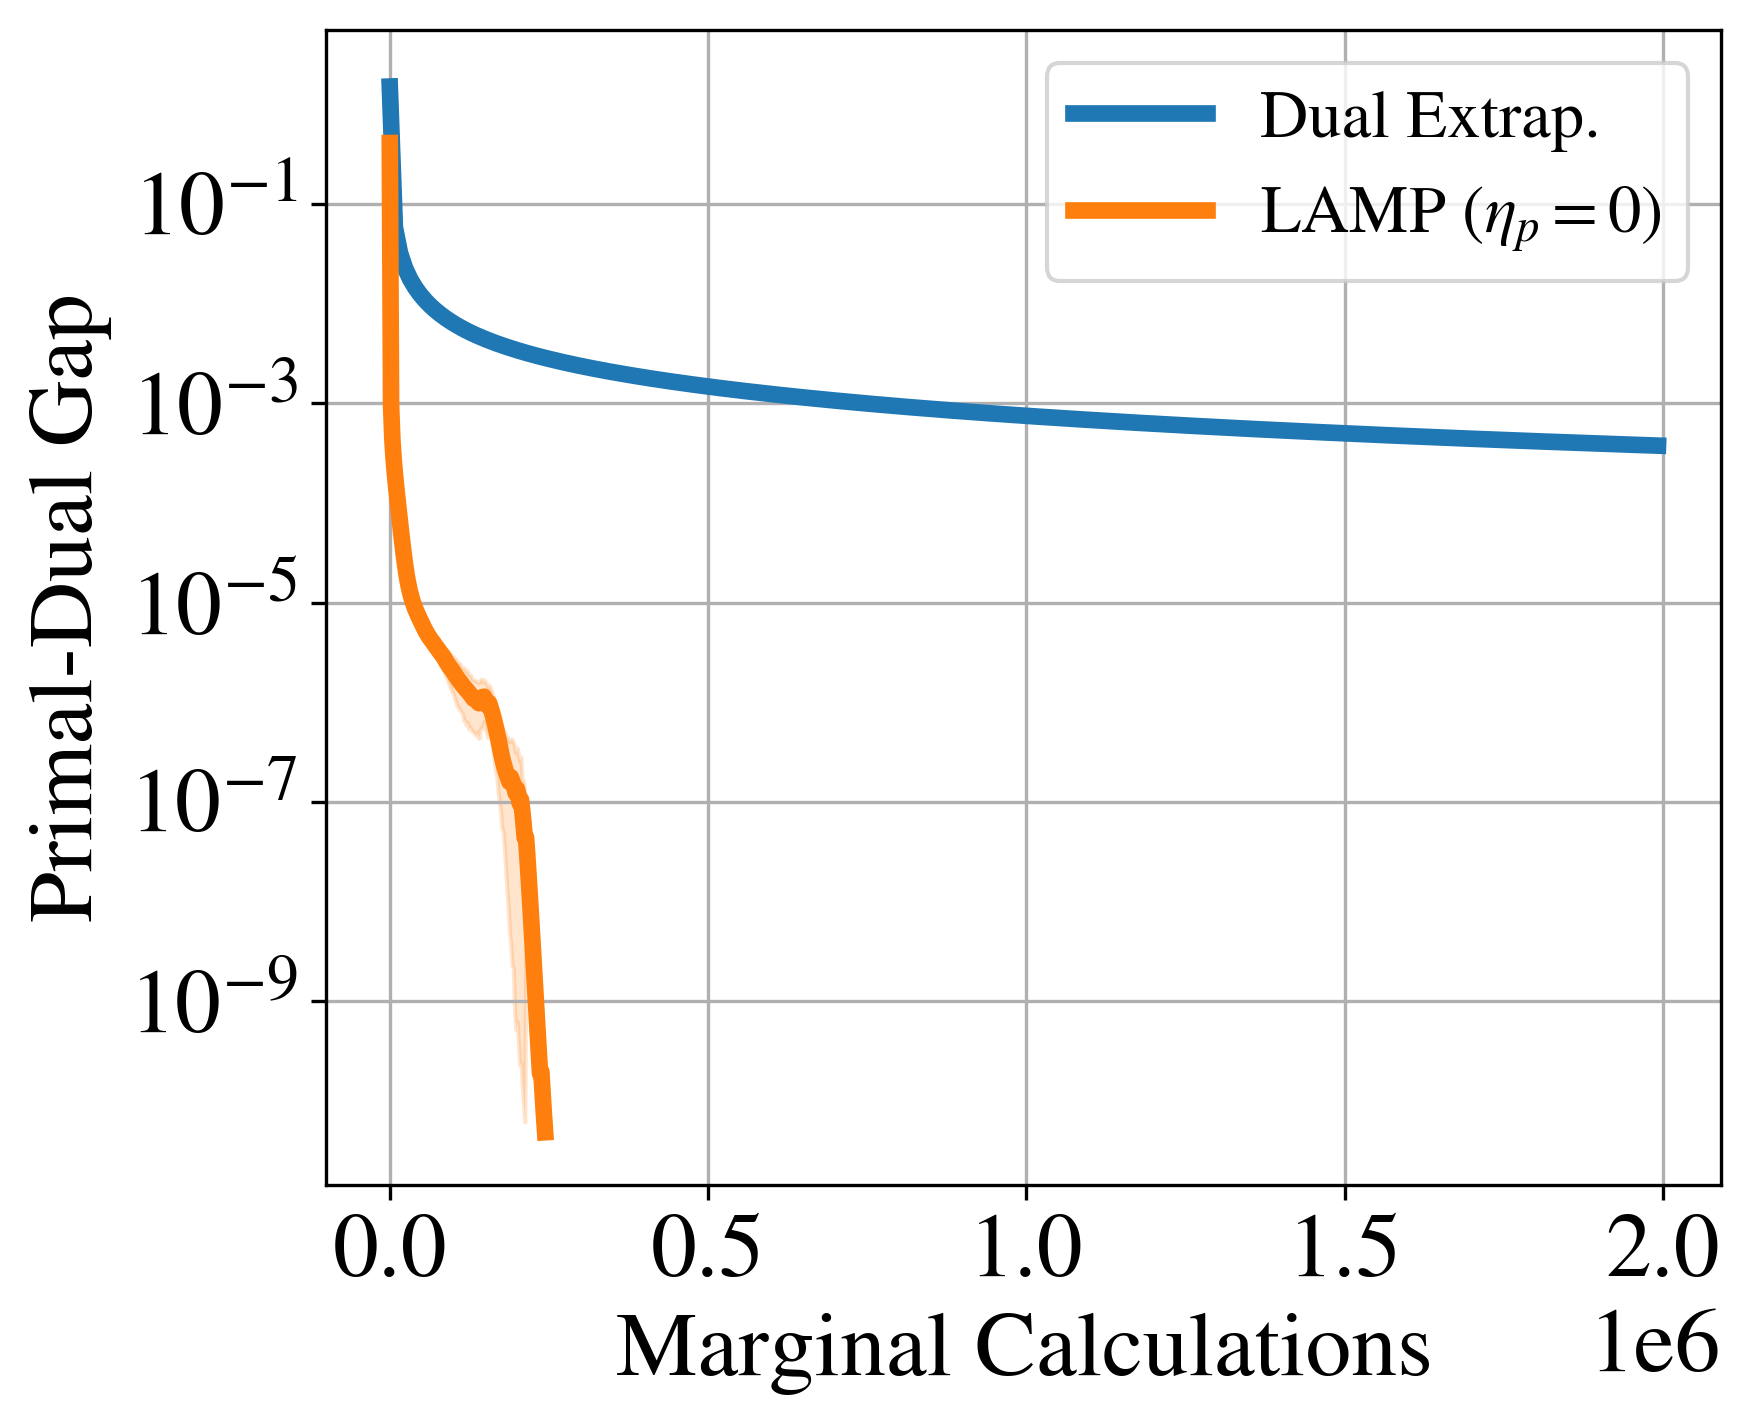

In [6]:
df = pd.read_csv("../data_archive/fig_5_dual_extrap_comp.csv")

fig, ax = plt.subplots(figsize=(6,5))
sns.lineplot(df.query("(iter-1) % 1000 == 0"),ax=ax, x='inner_iter', y='pdgap', hue='Algorithm', linewidth=4)
ax.set_yscale('log')
ax.set_ylabel("Primal-Dual Gap")
ax.set_xlabel("Marginal Calculations")
ax.legend(fontsize=16)
ax.grid()
fig.savefig("../figures/dextrap_comparison.pdf", bbox_inches="tight")

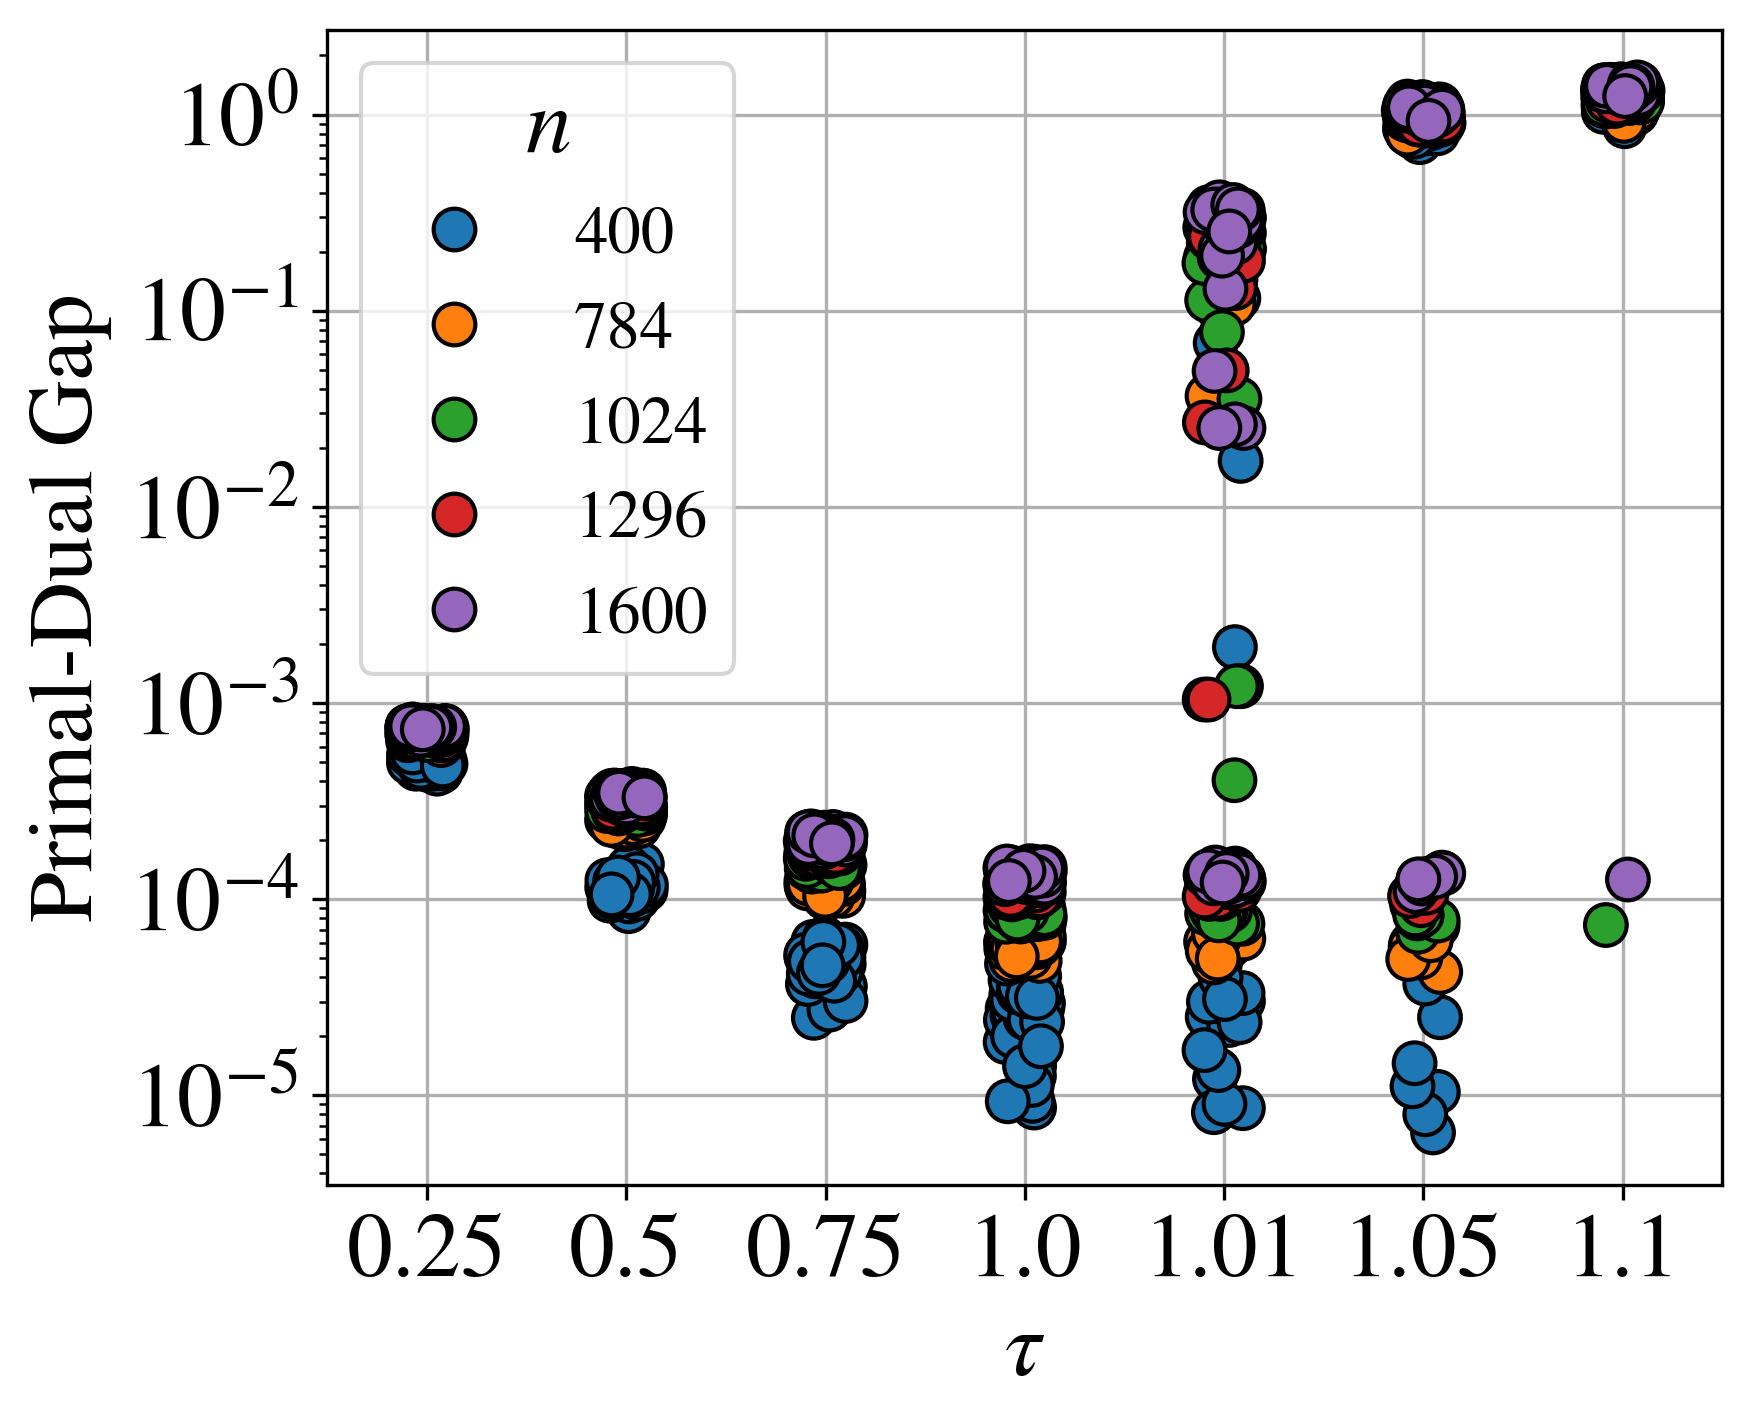

In [ ]:
df.to_csv("../data_archive/fig_4_timing.csv", index=False)
optimal_df = pd.read_csv("../data_archive/ground_truths_64_pnorms.csv") # exact minima found via emd2
df = df.merge(optimal_df, on=['problemclass', 'problem_1', 'problem_2', 'p'])
df['gap'] = abs(df['ot_objective'] - df['ot_distance']) + abs(df['infeas'])
# df["Algorithm"] = df['solver'].replace({"sinkhorn_kernel":"SK", "lamp_cuda_ctransfer": "LAMP"})
df["time(s)"] = (df["time(s)"]/2).round()*2
for p, sdf in df.groupby("p"):
    fig, ax = plt.subplots()
    first = True
    ax=sns.lineplot(sdf, x='time(s)', y='gap', hue='Algorithm',  palette='tab10',
                    legend=False if p != 2 or not first else True, 
                    hue_order=["LAMP", "SK ($\\eta = 10^{-5}$)","SK ($\\eta = 10^{-4}$)"], linewidth=3)
    first = False
    ax.set_yscale('log')
    ax.grid()
    
    if p==2:
        ax.legend(fontsize=18, title='Algorithm', title_fontsize=18)
    if p != np.inf:
        ax.set_title("$p=%s$" % (str(p)))
    else:
        ax.set_title("$p=\\infty$")
    ax.set_ylabel("Objective Gap")
    ax.set_xlabel("Wall Time (s)")
    plt.show()
    fig.savefig("../figures/pnorm_test_4096_%s.pdf" % (str(p)), bbox_inches='tight')

for p, sdf in df.groupby("p"):
    fig, ax = plt.subplots()
    first = True
    ax=sns.lineplot(sdf, x='time(s)', y='infeas', hue='Algorithm',  palette='tab10',
                    legend=False if p != 2 or not first else True, 
                    hue_order=["LAMP", "SK ($\\eta = 10^{-5}$)","SK ($\\eta = 10^{-4}$)" ], linewidth=3)
    first = False
    ax.set_yscale('log')
    ax.grid()
    
    if p==2:
        ax.legend(fontsize=18, title='Algorithm', title_fontsize=18)
    if p != np.inf:
        ax.set_title("$p=%s$" % (str(p)))
    else:
        ax.set_title("$p=\\infty$")
    ax.set_ylabel("Infeasibility")
    ax.set_xlabel("Wall Time (s)")
    fig.savefig("../figures/pnorm_test_4096_%s_infeas.pdf" % (str(p)), bbox_inches='tight')
    plt.show()

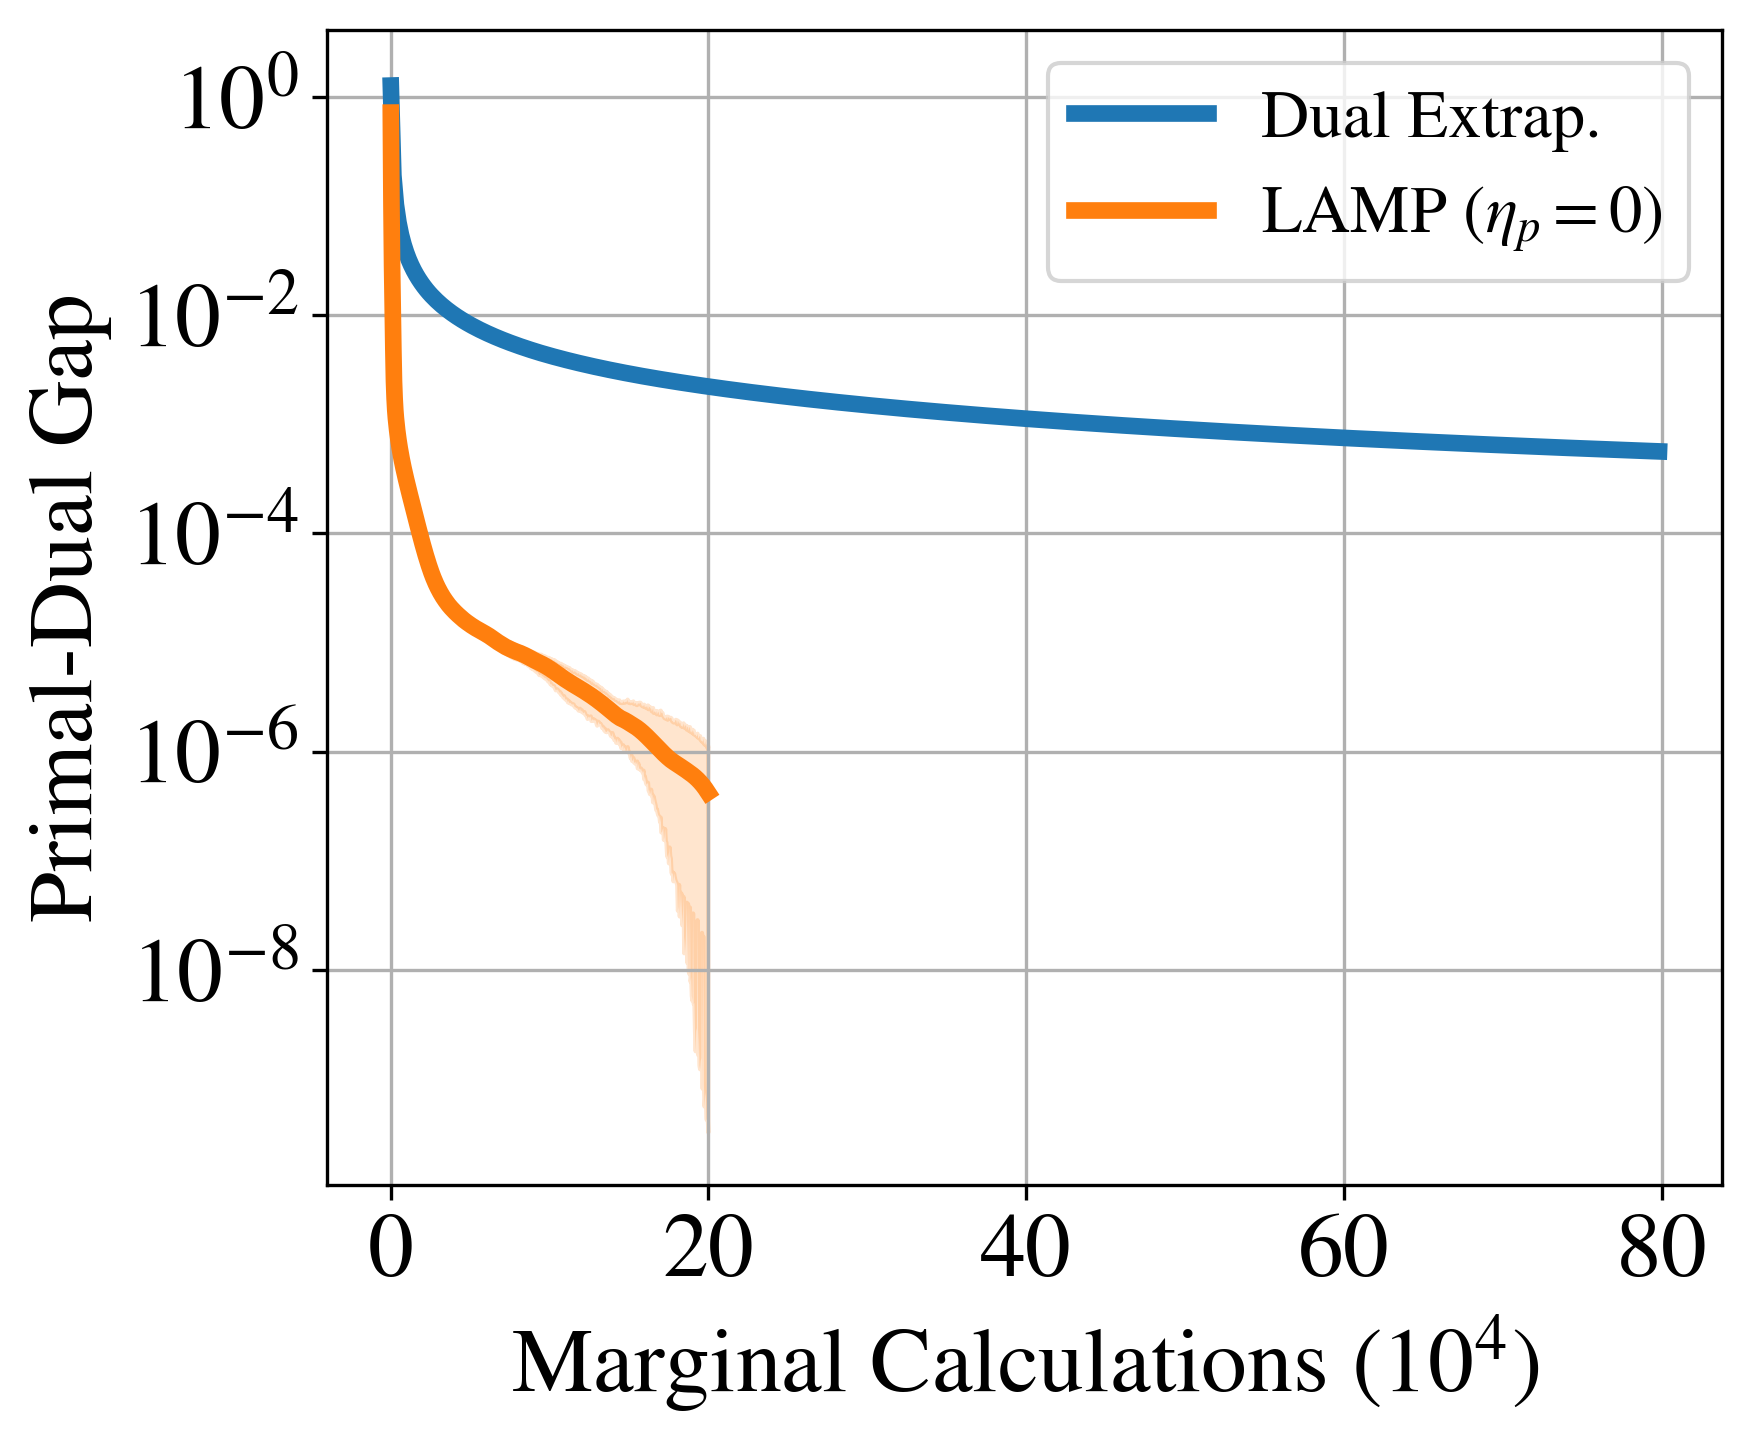

In [10]:
from glob import glob
from pathlib import Path
from matplotlib.ticker import LogFormatterMathtext
import re
df_dual_data =[] 
df_dxg_data =[] 
re_pattern = re.compile(r'(\w+)_32_(\d+_\d+)')
class_dict = {
    "classicimages": "ClassicImages",
    "grfsmooth": "GRFSmooth",
    "grfrough": "GRFRough",
}
for v in glob("../data/*0e+00_dual_extrapolation_log.csv"):
    if "grfsmooth" in v:
        continue
    
    basename = os.path.basename(v)
    other_name = f"../data/{basename.replace('dual_extrapolation', 'dual_extragradient')}"
    if not os.path.exists(other_name):
        continue
    df =  pd.read_csv(v)
    classname, prob = re_pattern.findall(v)[0]
    df["problem"] = prob +  class_dict[classname]
    df["Class"] = class_dict[classname]
    df_dual_data.append(df)
    df =  pd.read_csv(other_name)
    
    df["problem"] = prob +  class_dict[classname]
    df["Class"] = class_dict[classname]
    df_dxg_data.append(df)
df_dual_extrap = pd.concat(df_dual_data).reset_index(drop=True)
df_dual_extrap["Algorithm"]="Dual Extrap."
df_dxg = pd.concat(df_dxg_data).reset_index(drop=True)
df_dxg["Algorithm"]="LAMP ($\\eta_p=0$)"
df_dual_extrap['inner_iter'] /= 1e4
df_dxg['inner_iter'] = df_dxg['iter'] * 2 / 1e4
df = pd.concat([df_dual_extrap, df_dxg], ignore_index=True)
# df_dxg = pd.read_csv(f"{os.environ['DATA']}/icml_eot/broad_test_preprint_10_20_25/data/classicimages_32_2_6_1e-06_dual_extragradient_log.csv")
df['pdgap'] = df['primal']-df['dual']
fig, ax = plt.subplots(figsize=(6,5))
sns.lineplot(df.query("(iter-1) % 200 == 0"),ax=ax, x='inner_iter', y='pdgap', hue='Algorithm', linewidth=4)
# sns.lineplot(df_dxg.query("(iter-1) % 200 == 0"),ax=ax, x='inner_iter', y='pdgap', label="LAMP", linewidth=3)
ax.set_yscale('log')
ax.set_ylabel("Primal-Dual Gap")
# ax.set_xlim((0, 40))
ax.set_xlabel("Marginal Calculations ($10^4$)")
ax.legend(fontsize=16)
# ax.set_x
# ax.legend_ = None
ax.grid()
fig.savefig("../figures/dextrap_comparison.pdf", bbox_inches="tight")

In [14]:
df.query("Algorithm==\"Dual Extrap.\"").sort_values(by='time(s)', ascending=False).drop_duplicates('problem').median(numeric_only=True)

time(s)           232.524286
iter            99801.000000
inner_iter         79.840800
infeas              0.000021
ot_objective        0.001313
primal              0.001349
dual                0.000813
pdgap               0.000536
dtype: float64

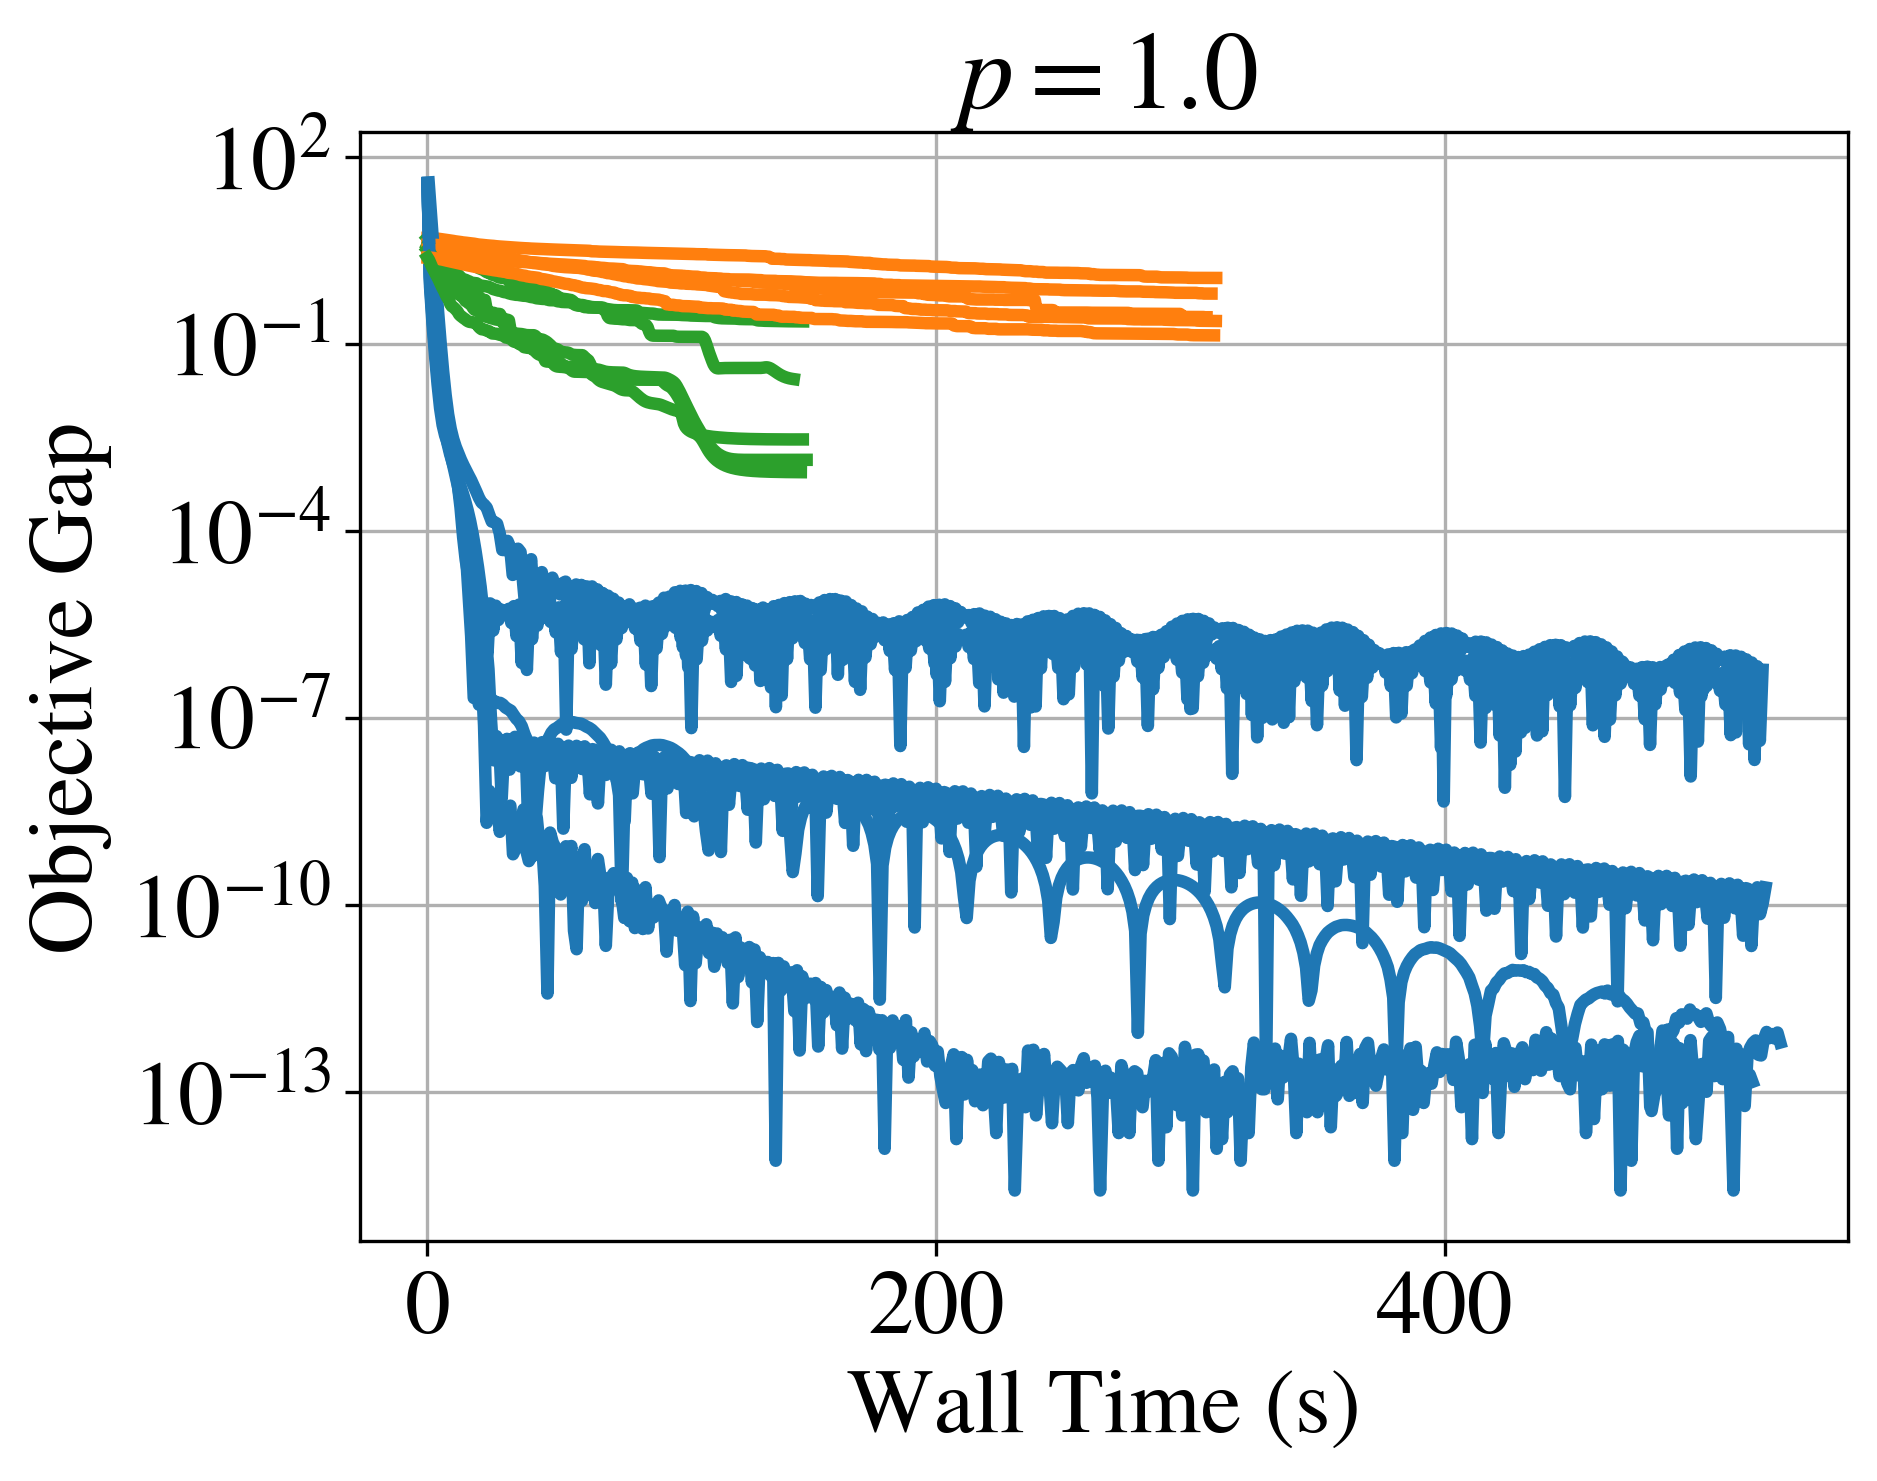

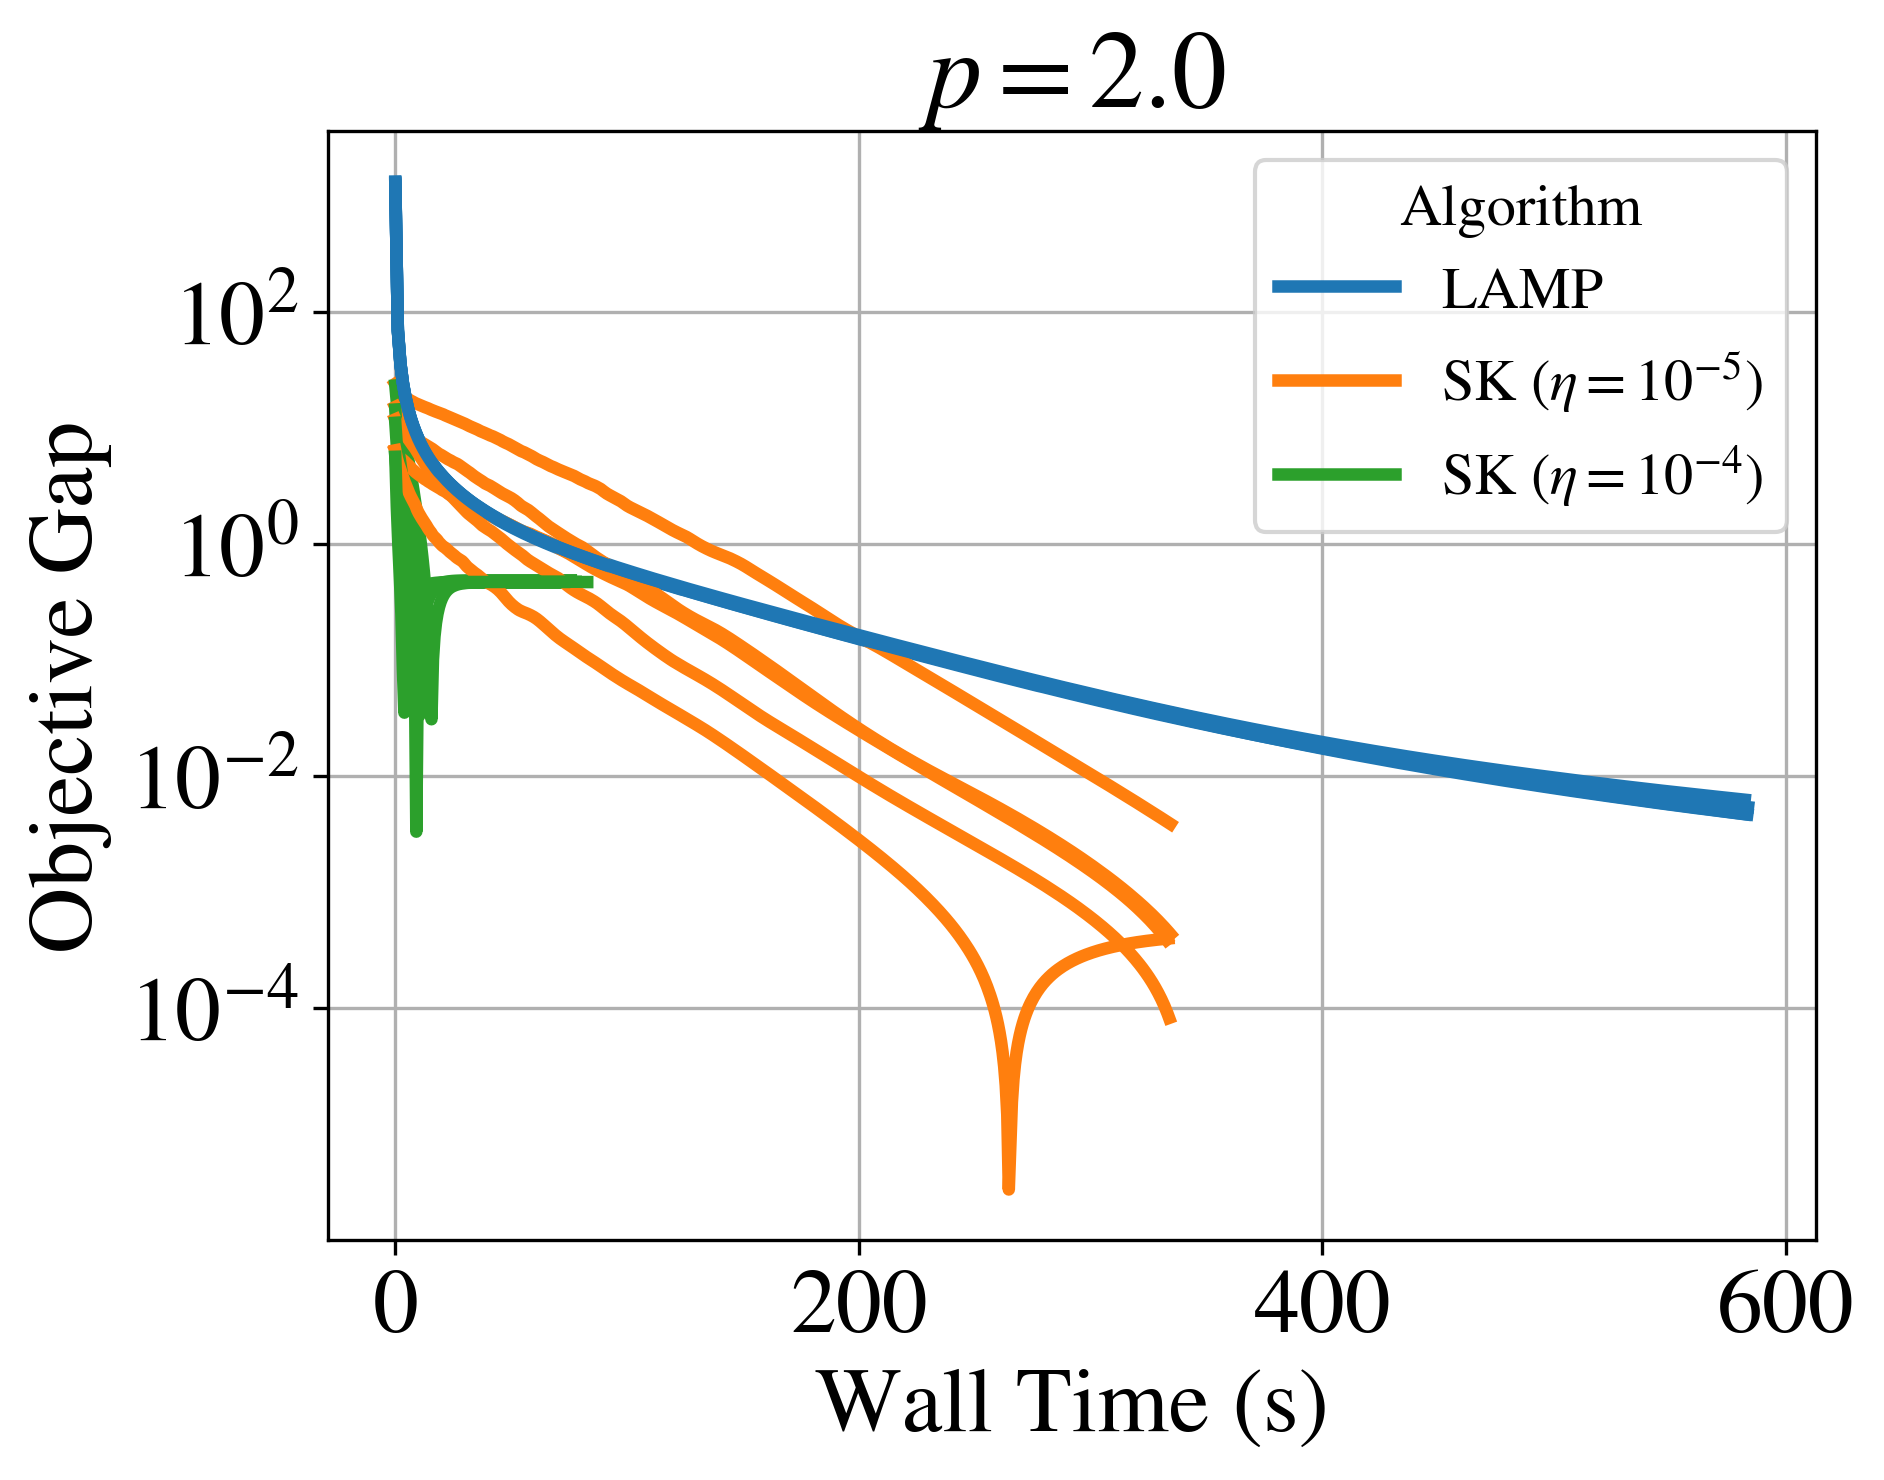

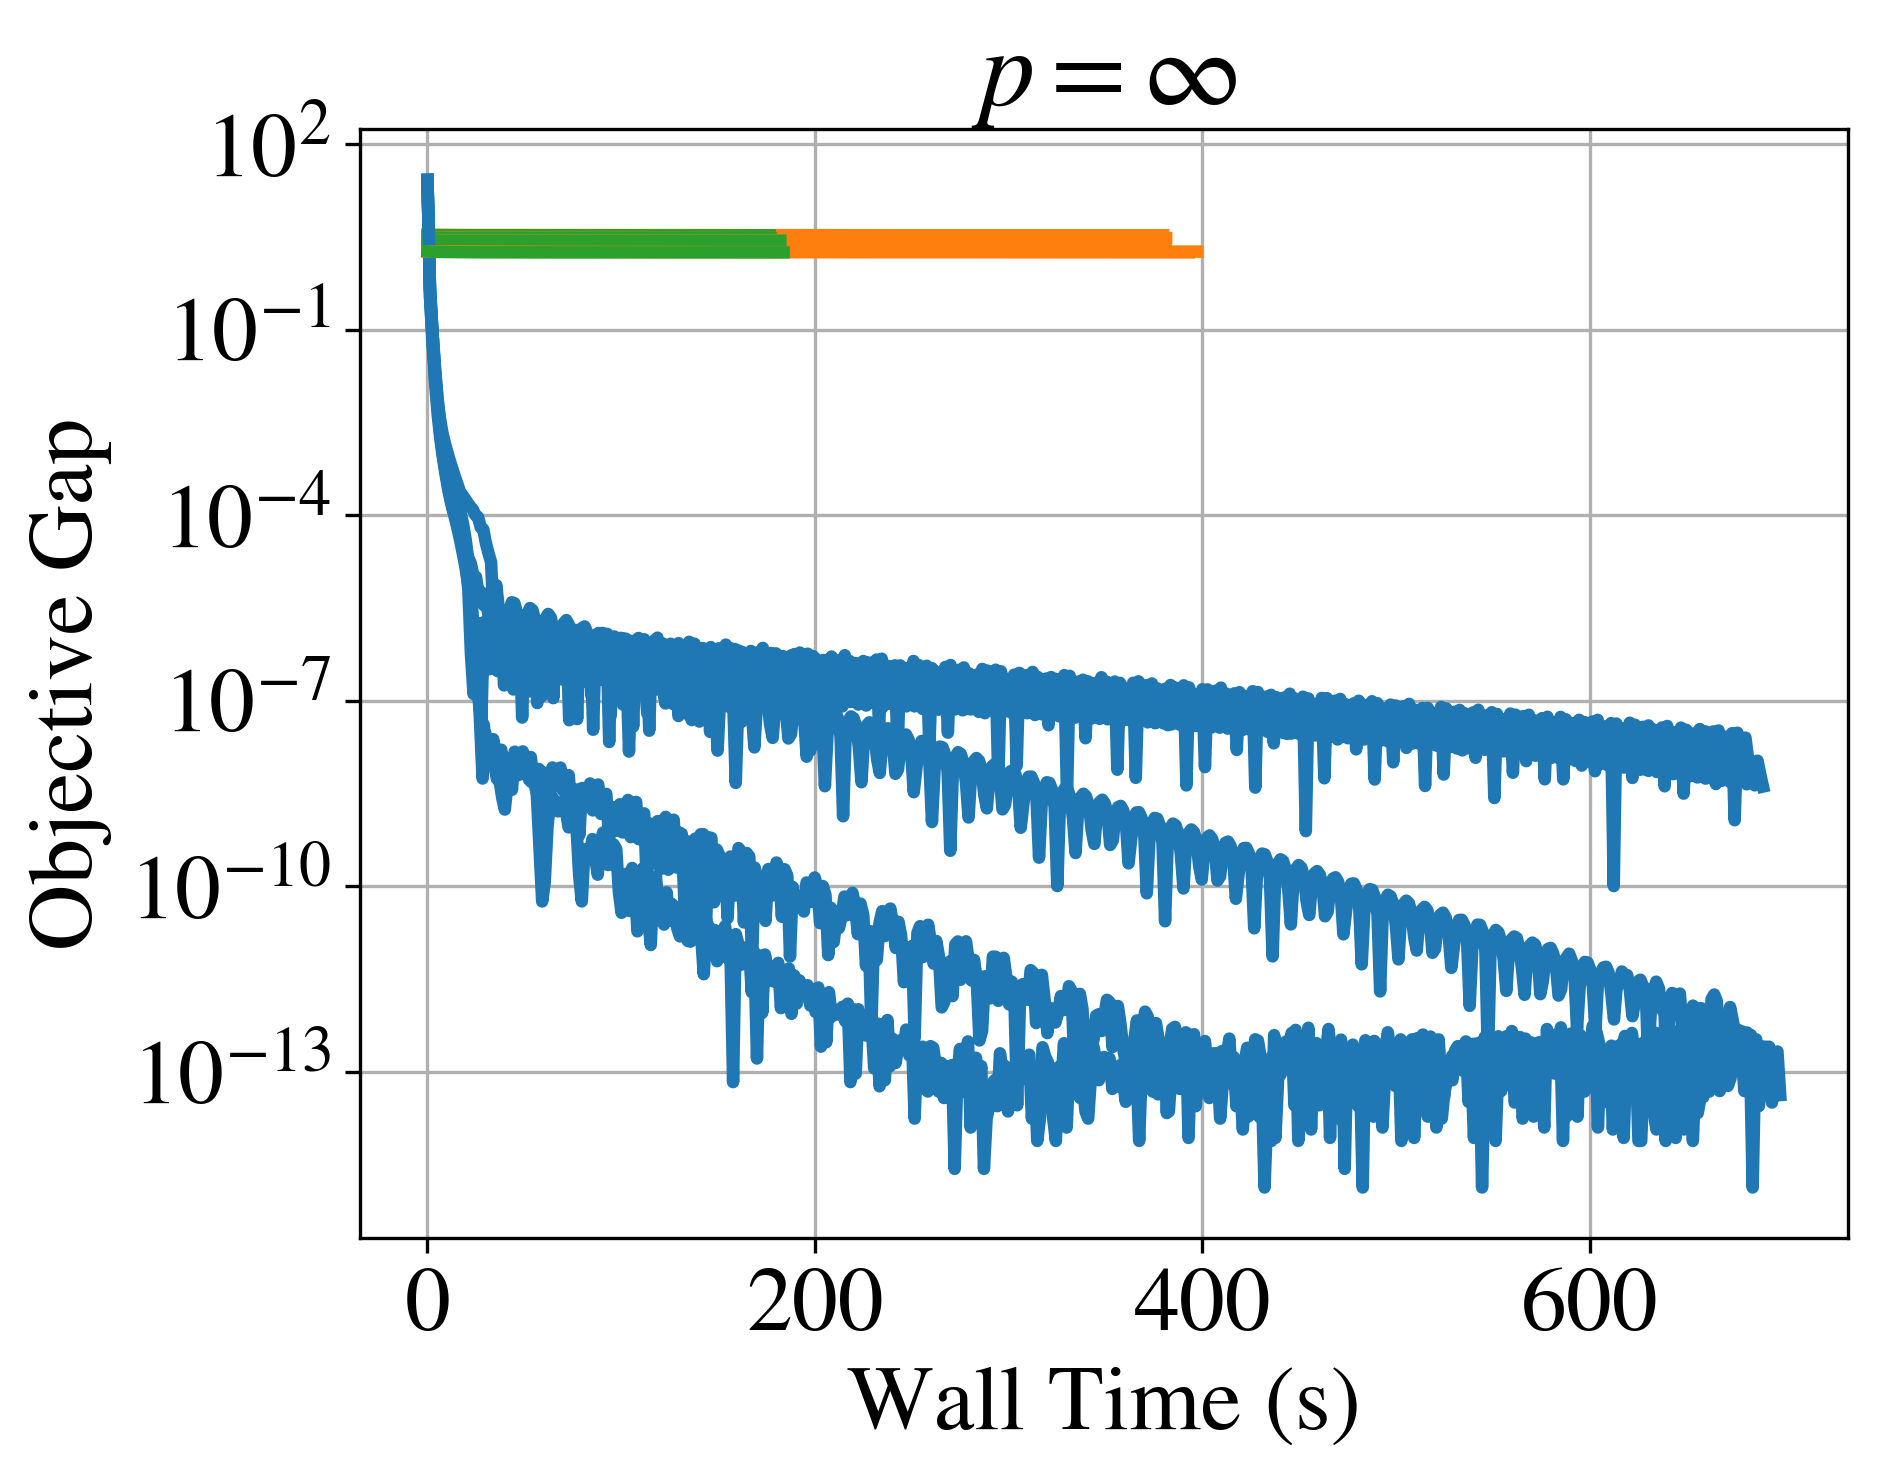

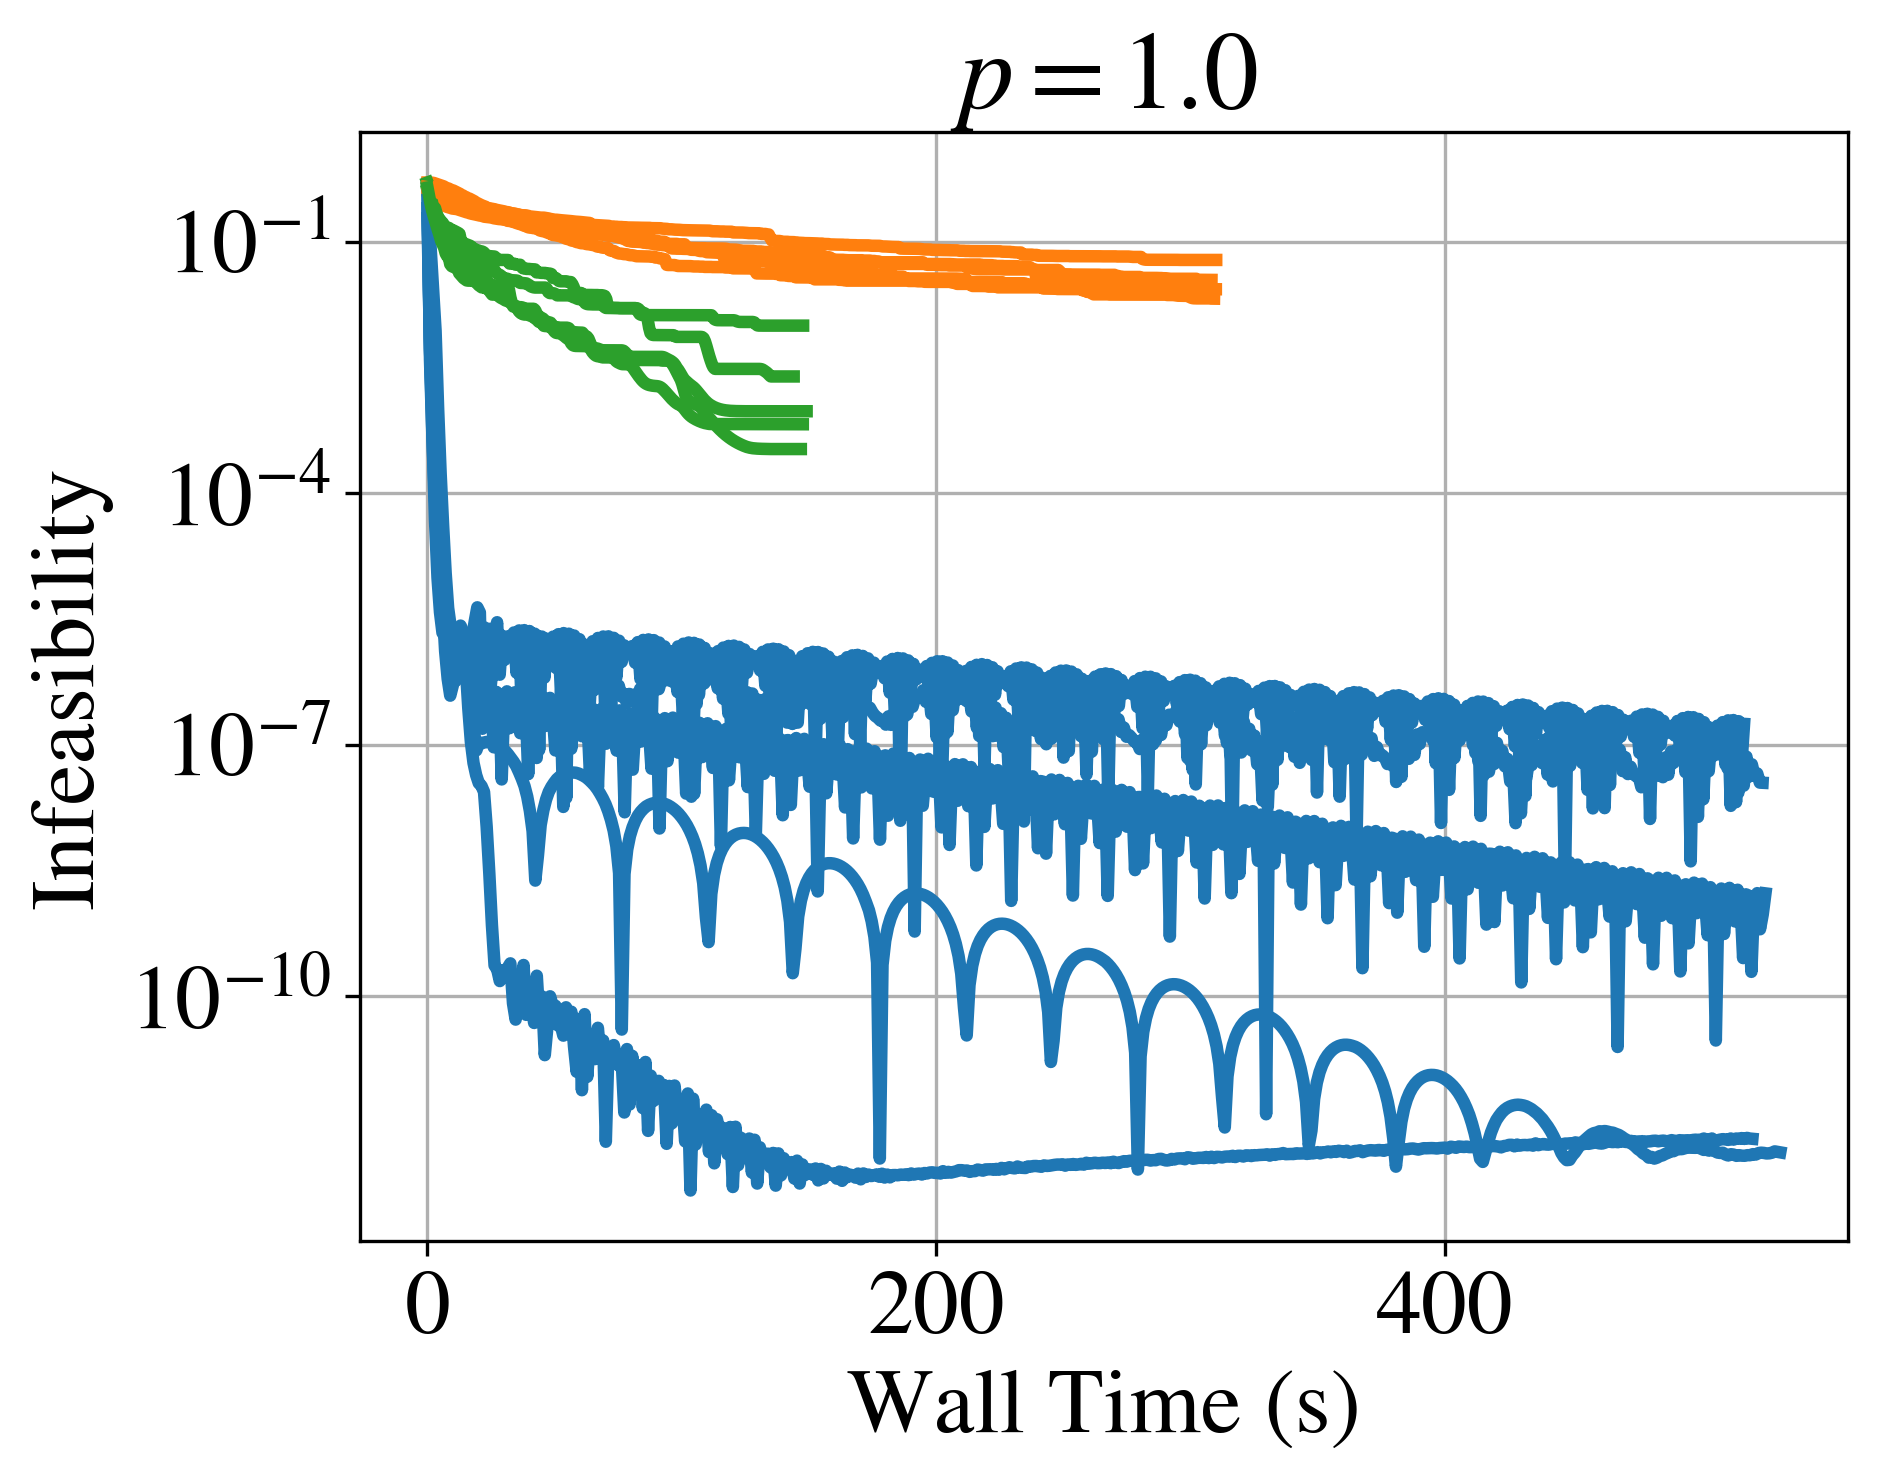

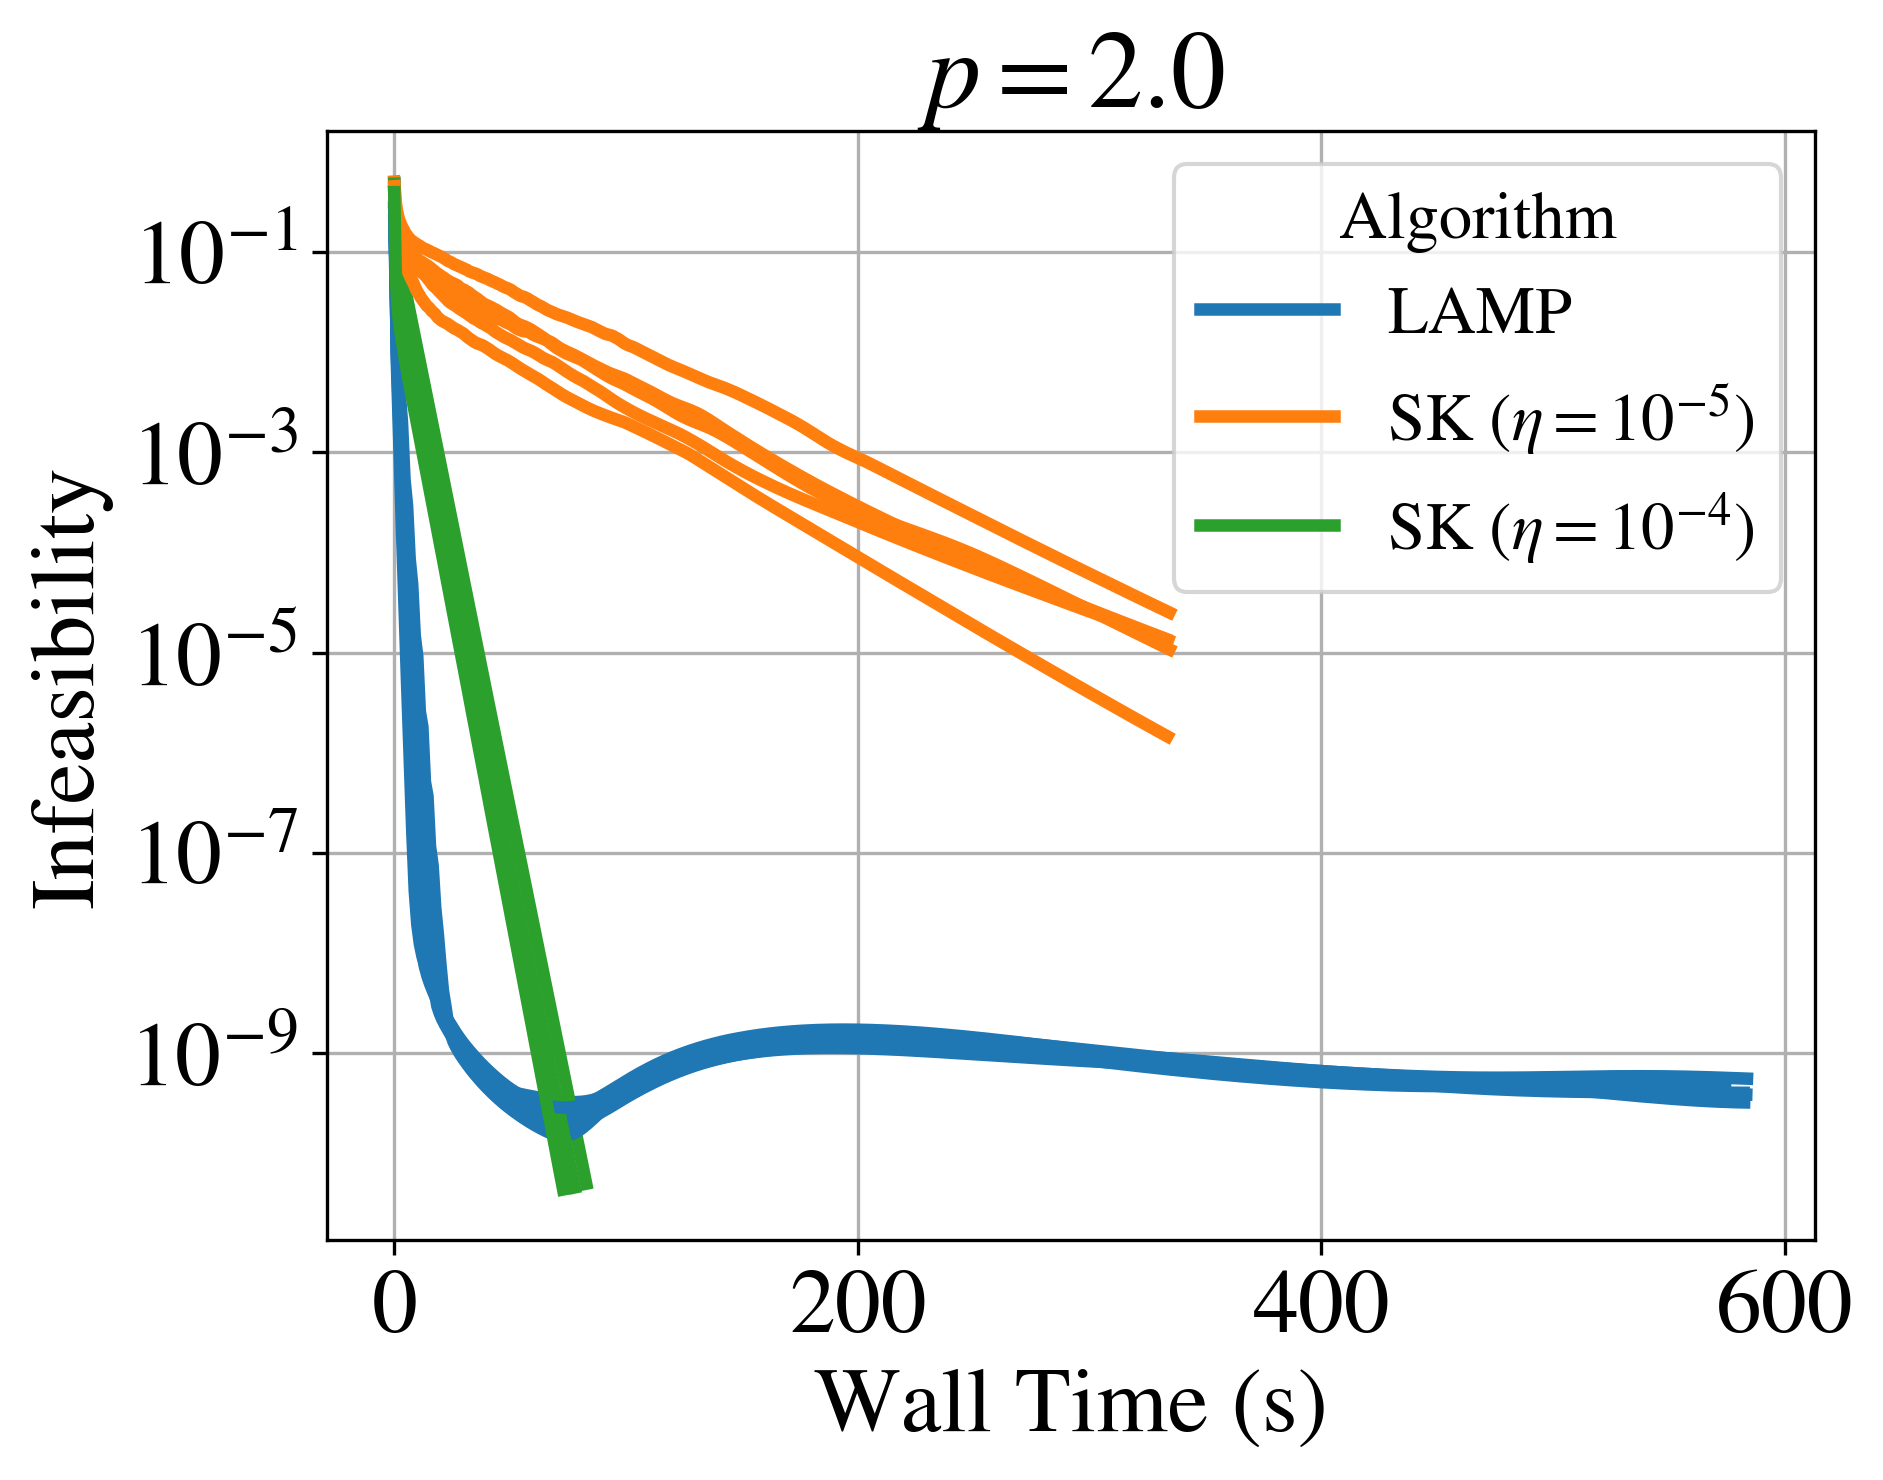

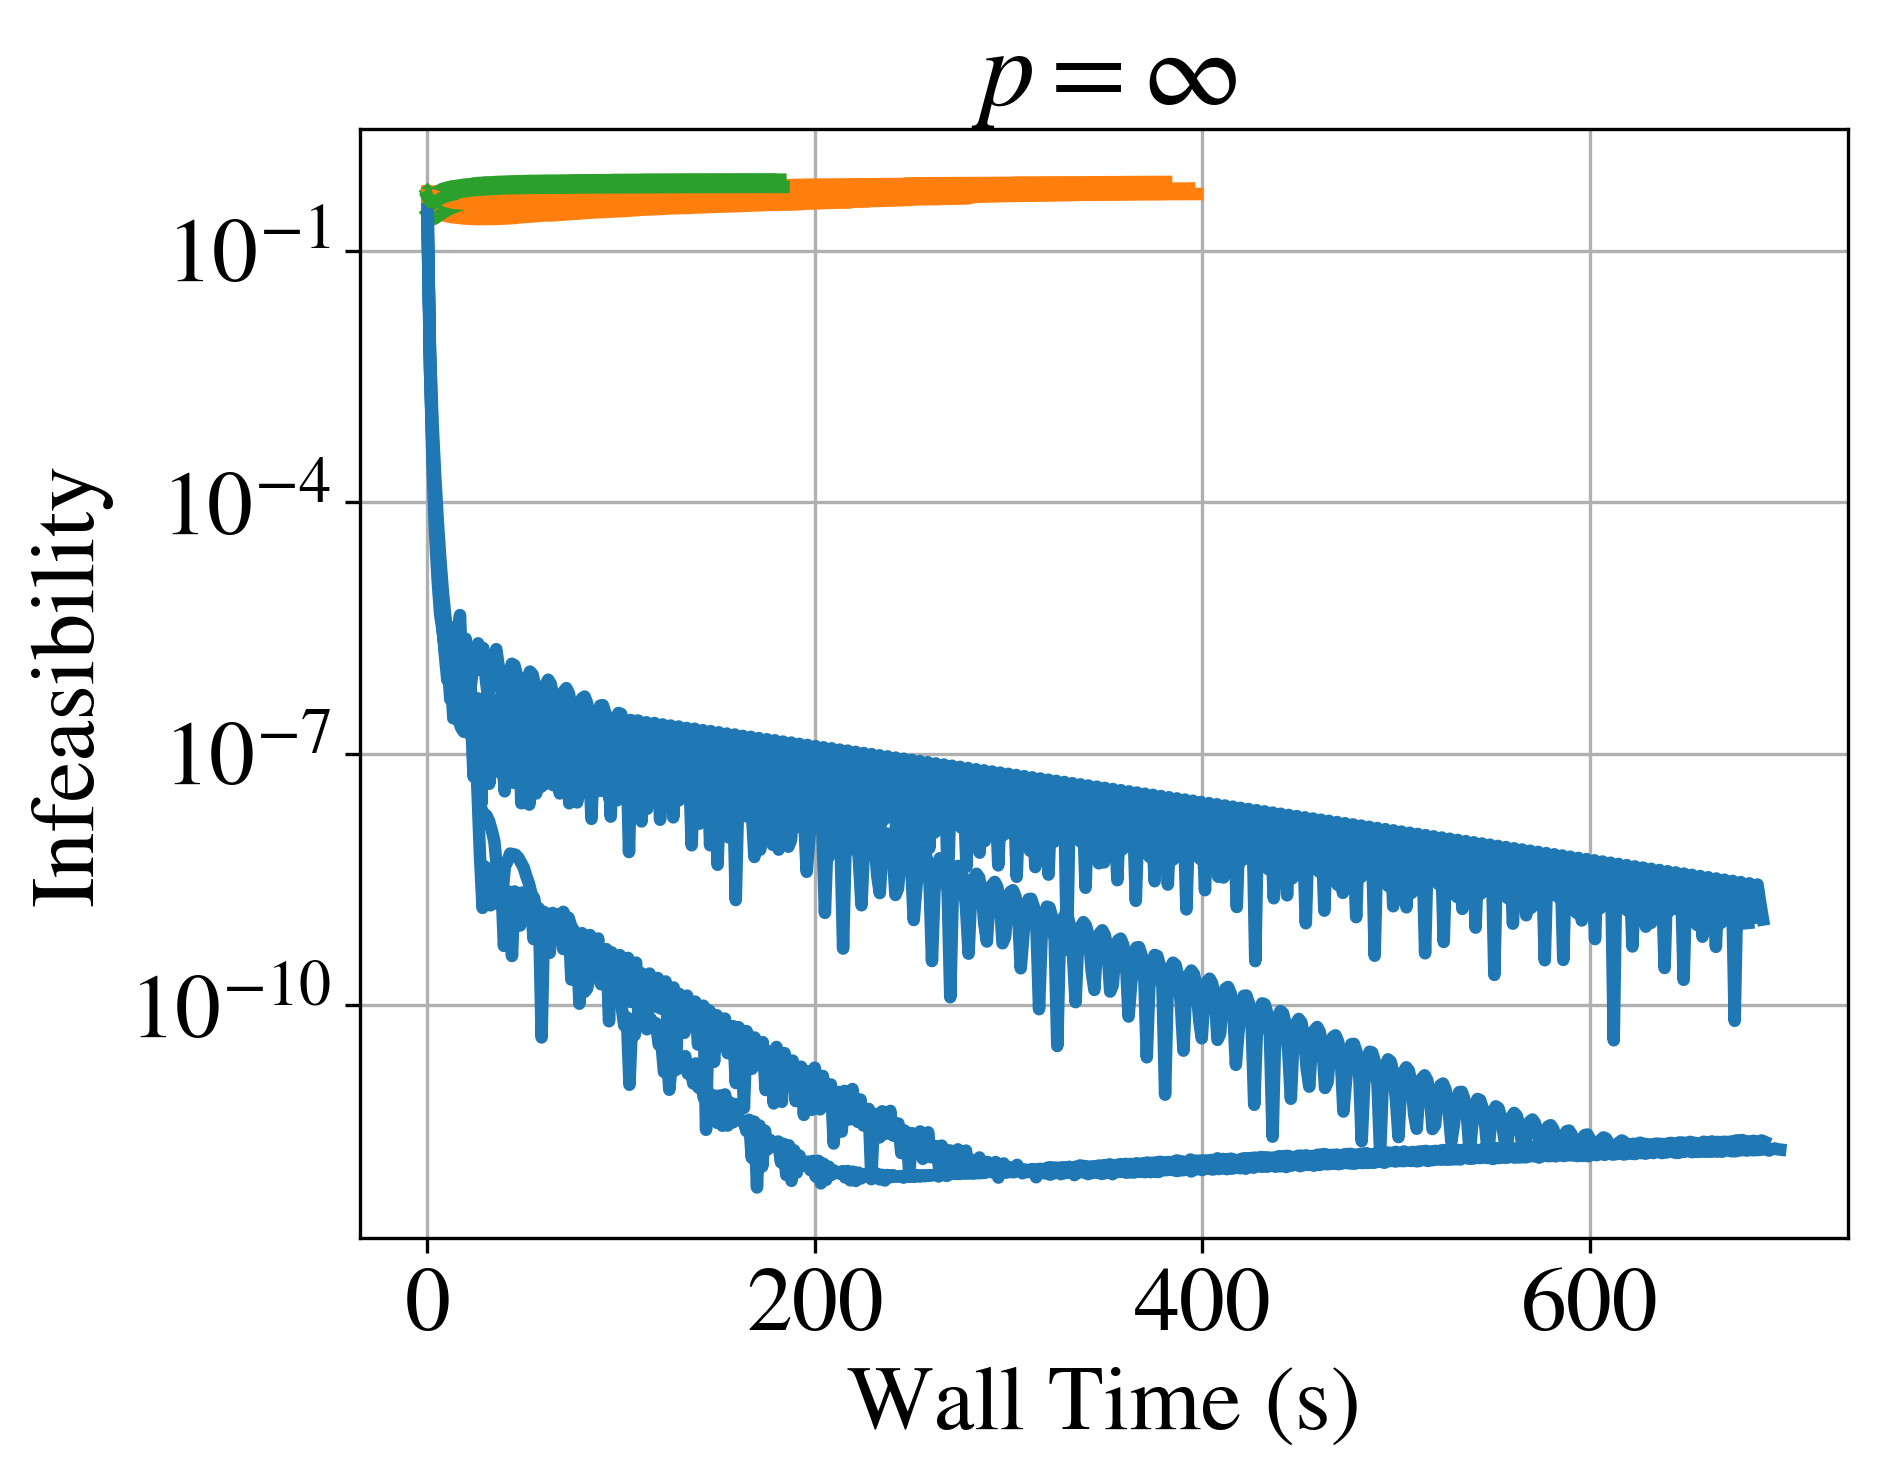

In [ ]:
import re

re_pattern =re.compile( r"(\w+)_64_(\d+)_(\d+)_(1e-04_sinkhorn|0e\+00_sinkhorn|0e\+00_dual_extragradient)_(1|2|Inf)_log.csv")
fnames = filter(lambda x: re.match(re_pattern, x)!=None, os.listdir("../data"))
data = []
for fname in fnames:
    df = pd.read_csv(f"../data/{fname}")
    classname, prob1, prob2, solver, norm = re_pattern.findall(fname)[0]
    df['problemclass'] = {"classicimages": "ClassicImages", "grfsmooth": 'GRFsmooth', "grfrough": "GRFrough"}[classname]
    if solver == "0e+00_sinkhorn":
        df["Algorithm"] = "SK ($\\eta = 10^{-5}$)"
    elif solver == "1e-04_sinkhorn":
        df["Algorithm"] = "SK ($\\eta = 10^{-4}$)"
    elif solver == "0e+00_dual_extragradient":
        df["Algorithm"] = "LAMP"
    df['problem_1'] = f"data64_10{int(prob1):02d}.csv"
    df['problem_2'] = f"data64_10{int(prob2):02d}.csv"
    # df['solver'] = solver
    df['p'] = {"1": 1.0, "2": 2.0, "Inf": np.inf}[norm]
    data.append(df)
df = pd.concat(data, ignore_index=True)
optimal_df = pd.read_csv("/home/matt/Documents/data/icml_eot/ground_truths_64_pnorms.csv")
df = df.merge(optimal_df, on=['problemclass', 'problem_1', 'problem_2', 'p'])
df['gap'] = abs(df['ot_objective'] - df['ot_distance']) 
# df["Algorithm"] = df['solver'].replace({"sinkhorn_kernel":"SK", "lamp_cuda_ctransfer": "LAMP"})

for p, sdf in df.groupby("p"):
    fig, ax = plt.subplots()
    
    first = True
    for (p1, p2, pclass), ssdf in sdf.groupby(["problem_1", "problem_2", "problemclass"]):
        ax=sns.lineplot(ssdf, x='time(s)', y='gap', hue='Algorithm',  palette='tab10', legend=False if p != 2 or not first else True, hue_order=["LAMP", "SK ($\\eta = 10^{-5}$)","SK ($\\eta = 10^{-4}$)" , ], linewidth=3)
        first = False
        ax.set_yscale('log')
        ax.grid()
    
    if p==2:
        ax.legend(fontsize=14, title='Algorithm', title_fontsize=14)
    if p != np.inf:
        ax.set_title("$p=%s$" % (str(p)))
    else:
        ax.set_title("$p=\\infty$")
    ax.set_ylabel("Objective Gap")
    ax.set_xlabel("Wall Time (s)")
    fig.savefig("../figures/pnorm_test_4096_%s.pdf" % (str(p)), bbox_inches='tight')

first = True
for p, sdf in df.groupby("p"):
    # first = True
    fig, ax = plt.subplots()
    first = True
    for (p1, p2, pclass), ssdf in sdf.groupby(["problem_1", "problem_2", "problemclass"]):
        ax=sns.lineplot(ssdf, x='time(s)', y='infeas', hue='Algorithm',  palette='tab10', legend=False if p != 2 or not first else True, hue_order=["LAMP", "SK ($\\eta = 10^{-5}$)","SK ($\\eta = 10^{-4}$)" , ], linewidth=3)
        first = False
        ax.set_yscale('log')
        ax.grid()
    if p==2.0:
        ax.legend(fontsize=16, title='Algorithm', title_fontsize=16)
    if p != np.inf:
        ax.set_title("$p=%s$" % (str(p)))
    else:
        ax.set_title("$p=\\infty$")
    ax.set_ylabel("Infeasibility")
    ax.set_xlabel("Wall Time (s)")
    fig.savefig("../figures/pnorm_test_4096_%s_infeas.pdf" % (str(p)), bbox_inches='tight')

In [15]:
df =pd.concat([ pd.read_csv("../data/classicimages_64_2_6_0e+00_sinkhorn_log.csv").rename(columns={"dual":"solver"}), pd.read_csv("../data/classicimages_64_2_6_0e+00_dual_extragradient_log.csv")])
df

time(s)          iter    infeas  ot_objective  \
1.323168      1.0000      0.471617  4.594842   -464.579794   
3.057373    201.0000      0.227325  1.785563    -28.855014   
3.721113    401.0000      0.173662  1.435873    -11.259854   
4.395034    601.0000      0.149249  1.382269     -1.141893   
5.069843    801.0000      0.138697  1.371733      6.121303   
...              ...           ...       ...           ...   
495.000000  500.1709  99001.000000       NaN           NaN   
496.000000  501.1614  99201.000000       NaN           NaN   
497.000000  502.1651  99401.000000       NaN           NaN   
498.000000  503.1687  99601.000000       NaN           NaN   
499.000000  504.1738  99801.000000       NaN           NaN   

                              solver  primal  dual  
1.323168             sinkhorn_kernel     NaN   NaN  
3.057373             sinkhorn_kernel     NaN   NaN  
3.721113             sinkhorn_kernel     NaN   NaN  
4.395034             sinkhorn_kernel     NaN   NaN  
5.069843             sinkhorn_kernel     NaN   NaN  
...                              ...     ...   ...  
495.000000  extragrad_dual_ctransfer     NaN   NaN  
496.000000  extragrad_dual_ctransfer     NaN   NaN  
497.000000  extragrad_dual_ctransfer     NaN   NaN  
498.000000  extragrad_dual_ctransfer     NaN   NaN  
499.000000  extragrad_dual_ctransfer     NaN   NaN  

[1000 rows x 7 columns]